<a href="https://colab.research.google.com/github/alim98/MPI/blob/main/Final_DL_VGG_MPI_V15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Essential downloads

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip uninstall ploty
!pip install plotly==5.3.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.9/23.9 MB 72.1 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.24.1
    Uninstalling plotly-5.24.1:
      Successfully uninstalled plotly-5.24.1


In [3]:
!wget -O downloaded_file.zip "https://drive.usercontent.google.com/download?id=1iHPBdBOPEagvPTHZmrN__LD49emXwReY&export=download&authuser=0&confirm=t&uuid=631d60dd-569c-4bb1-a9e8-d681f0ed3d43&at=APvzH3r4me8x_LwP3n8O7lgPo8oK%3A1733988188000"
!wget -O vesicle_cloud__syn_interface__mitochondria_annotation.zip "https://drive.usercontent.google.com/download?id=1qRibZL3kr7MQJQRgDFRquHMQlIGCN4XP&export=download&authuser=0&confirm=t&uuid=631d60dd-569c-4bb1-a9e8-d681f0ed3d43&at=APvzH3r4me8x_LwP3n8O7lgPo8oK%3A1733988188000"

!unzip -q downloaded_file.zip
!unzip -q vesicle_cloud__syn_interface__mitochondria_annotation.zip

!pip install transformers scikit-learn matplotlib seaborn torch torchvision umap-learn git+https://github.com/funkelab/funlib.learn.torch.git
!pip install openpyxl


--2025-02-18 10:18:18--  https://drive.usercontent.google.com/download?id=1iHPBdBOPEagvPTHZmrN__LD49emXwReY&export=download&authuser=0&confirm=t&uuid=631d60dd-569c-4bb1-a9e8-d681f0ed3d43&at=APvzH3r4me8x_LwP3n8O7lgPo8oK%3A1733988188000
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.130.132, 2404:6800:4003:c01::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.130.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1264688649 (1.2G) [application/octet-stream]
Saving to: ‘downloaded_file.zip’

downloaded_file.zip 100%[===================>]   1.18G  60.1MB/s    in 19s     

2025-02-18 10:18:40 (64.8 MB/s) - ‘downloaded_file.zip’ saved [1264688649/1264688649]

--2025-02-18 10:18:40--  https://drive.usercontent.google.com/download?id=1qRibZL3kr7MQJQRgDFRquHMQlIGCN4XP&export=download&authuser=0&confirm=t&uuid=631d60dd-569c-4bb1-a9e8-d681f0ed3d43&at=APvzH3r4me8x_LwP3n8O7lgPo8oK%3A1733988188000
Resolvin


---

# Synapse Dataset Processing

This repository provides a tool for processing 3D volume data of synapse structures for segmentation, visualization, and analysis. The tool allows users to load, segment, and process raw and segmented image data and generate 3D visualizations of synapse structures.

The code processes multiple bounding boxes, each containing raw, segmentation, and additional mask data. Users can customize the segmentation overlay and generate visualizations in the form of segmented 3D cubes.

## Features

- Load raw, segmentation, and additional mask data from directories.
- Customize segmentation overlays for different synapse structures (e.g., vesicles, clefts, mitochondria).
- Process multiple bounding boxes in parallel.
- Generate 3D cubes with customizable segmentation.
- Alpha blending for better visualization of the data.
- Ability to save generated GIFs for visual inspection.
- Efficient processing pipelines for handling large synapse datasets.

## Requirements

Before using the tool, make sure you have the following Python packages installed:

```bash
pip install numpy pandas imageio tqdm torch torchvision scipy
```

## Arguments Overview

To run the script, use the following arguments to configure the dataset processing:

### `--raw_base_dir` (Required)
- **Description**: Directory containing the raw image data files (e.g., `.tif` slices).
- **Type**: `str`
- **Default**: `'raw'`
- **Example**:
    ```bash
    --raw_base_dir /path/to/raw/data
    ```

### `--seg_base_dir` (Required)
- **Description**: Directory containing segmentation data files for pre and post-synaptic structures (e.g., `.tif` slices).
- **Type**: `str`
- **Default**: `'seg'`
- **Example**:
    ```bash
    --seg_base_dir /path/to/segmentation/data
    ```

### `--add_mask_base_dir` (Optional)
- **Description**: Directory containing additional mask files for vesicles, clefts, and mitochondria (e.g., `.tif` slices).
- **Type**: `str`
- **Default**: `''` (empty string, optional)
- **Example**:
    ```bash
    --add_mask_base_dir /path/to/additional/masks
    ```

### `--bbox_name` (Required)
- **Description**: List of bounding box names to process. Each bounding box corresponds to a set of data files (raw, segmentation, and masks).
- **Type**: `list[str]`
- **Default**: `['bbox1']`
- **Example**:
    ```bash
    --bbox_name bbox1 bbox2 bbox3
    ```

### `--excel_file` (Required)
- **Description**: Path to the directory containing Excel files with synapse information. The data from these Excel files will be used for synapse annotations.
- **Type**: `str`
- **Default**: `''` (required path to a directory)
- **Example**:
    ```bash
    --excel_file /path/to/excel/files
    ```

### `--csv_output_dir` (Optional)
- **Description**: Directory to save CSV outputs, such as processed data summaries.
- **Type**: `str`
- **Default**: `'csv_outputs'`
- **Example**:
    ```bash
    --csv_output_dir /path/to/csv/outputs
    ```

### `--size` (Optional)
- **Description**: Target size for the frames. This will resize the frames to this size before processing.
- **Type**: `tuple[int, int]`
- **Default**: `(80, 80)`
- **Example**:
    ```bash
    --size 128 128
    ```

### `--subvol_size` (Optional)
- **Description**: Subvolume size for extracting regions from the full volume. This size determines the 3D crop of the data.
- **Type**: `int`
- **Default**: `80`
- **Example**:
    ```bash
    --subvol_size 128
    ```

### `--num_frames` (Optional)
- **Description**: Number of frames to extract from the data.
- **Type**: `int`
- **Default**: `80`
- **Example**:
    ```bash
    --num_frames 16
    ```

### `--save_gifs_dir` (Optional)
- **Description**: Directory to save generated GIFs for each segmentation type.
- **Type**: `str`
- **Default**: `'gifs'`
- **Example**:
    ```bash
    --save_gifs_dir /path/to/save/gifs
    ```

### `--alpha` (Optional)
- **Description**: Alpha blending factor for combining the raw image and the mask. This controls how much the unmasked areas are blended with a black overlay.
- **Type**: `float`
- **Default**: `0.5`
- **Example**:
    ```bash
    --alpha 0.7
    ```

### `--segmentation_type` (Required)
- **Description**: Defines which type of segmentation overlay to apply to the raw data. This option determines which mask type will be used for overlaying the raw image.
- **Type**: `int`
- **Choices**:
    - `0`: Raw image only (no overlay).
    - `1`: Presynapse region.
    - `2`: Postsynapse region.
    - `3`: Both presynapse and postsynapse.
    - `4`: Vesicles + Cleft (closest only).
    - `5`: All structures (vesicles, clefts, mitochondria, and both synaptic sides).
    - `6`: Vesicle cloud (closest).
    - `7`: Cleft regions only.
    - `8`: Mitochondria regions only.
    - `9`: Vesicle + Cleft combined (closest).
- **Default**: `6`
- **Example**:
    ```bash
    --segmentation_type 3
    ```

## Example Usage

Here is an example of how to run the script with the necessary arguments:

```bash
python data_loader.py \
    --raw_base_dir /path/to/raw/data \
    --seg_base_dir /path/to/segmentation/data \
    --add_mask_base_dir /path/to/additional/masks \
    --bbox_name bbox1 bbox2 \
    --excel_file /path/to/excel/files \
    --csv_output_dir /path/to/csv/outputs \
    --save_gifs_dir /path/to/save/gifs \
    --segmentation_type 2 \
    --alpha 0.5
```

## Segmentation Type Handling

The segmentation logic is based on the `segmentation_type` argument. It determines how to combine masks and create the desired visualization.

### Segmentation Logic:

- **`0`**: Raw image (no overlay)
- **`1`**: Presynapse region (based on overlap of vesicles with side1 or side2).
- **`2`**: Postsynapse region (based on overlap of vesicles with side1 or side2).
- **`3`**: Both presynapssde and postsynapse regions (overlay of both).
- **`4`**: Vesicles and clefts (closest components).
- **`5`**: All structures (vesicles, clefts, mitochondria, and both synaptic sides).
- **`6`**: Vesicle cloud (closest to target).
- **`7`**: Cleft regions (closest to target).
- **`8`**: Mitochondria regions (closest to target).
- **`9`**: Combined vesicle + cleft (closest to target).


In [70]:
import os
import glob
import io
import argparse
import multiprocessing
from typing import List, Tuple
import imageio
import numpy as np
import pandas as pd
import imageio.v3 as iio
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from torchvision import transforms
from scipy.ndimage import label, center_of_mass
from tqdm import tqdm
class Synapse3DProcessor:
    def __init__(self, size=(80, 80), mean=(0.485,), std=(0.229,)):
        # Use Grayscale without converting to 3-channel RGB
        self.transform = transforms.Compose([
            transforms.ToPILImage(),
            transforms.Resize(size),
            transforms.Grayscale(num_output_channels=1),  # Changed to 1 channel (grayscale)
            transforms.ToTensor(),
            # transforms.Normalize(mean=mean, std=std),
        ])


    def __call__(self, frames, return_tensors=None):
        processed_frames = [self.transform(frame) for frame in frames]
        pixel_values = torch.stack(processed_frames)
        if return_tensors == "pt":
            return {"pixel_values": pixel_values}
        else:
            return pixel_values

def load_volumes(bbox_name: str, raw_base_dir: str, seg_base_dir: str, add_mask_base_dir: str) -> Tuple[np.ndarray, np.ndarray, np.ndarray]:
    raw_dir = os.path.join(raw_base_dir, bbox_name)
    seg_dir = os.path.join(seg_base_dir, bbox_name)
    if bbox_name.startswith("bbox"):
        bbox_num = bbox_name.replace("bbox", "")
        add_mask_dir = os.path.join(add_mask_base_dir, f"bbox_{bbox_num}")
    else:
        add_mask_dir = os.path.join(add_mask_base_dir, bbox_name)
    raw_tif_files = sorted(glob.glob(os.path.join(raw_dir, 'slice_*.tif')))
    seg_tif_files = sorted(glob.glob(os.path.join(seg_dir, 'slice_*.tif')))
    add_mask_tif_files = sorted(glob.glob(os.path.join(add_mask_dir, 'slice_*.tif')))
    if not (len(raw_tif_files) == len(seg_tif_files) == len(add_mask_tif_files)):
        return None, None, None
    try:
        raw_vol = np.stack([iio.imread(f) for f in raw_tif_files], axis=0)
        seg_vol = np.stack([iio.imread(f).astype(np.uint32) for f in seg_tif_files], axis=0)
        add_mask_vol = np.stack([iio.imread(f).astype(np.uint32) for f in add_mask_tif_files], axis=0)
        return raw_vol, seg_vol, add_mask_vol
    except Exception as e:
        return None, None, None

def parse_args():
    parser = argparse.ArgumentParser(description="Synapse Dataset")
    parser.add_argument('--raw_base_dir', type=str, default='raw')
    parser.add_argument('--seg_base_dir', type=str, default='seg')
    parser.add_argument('--add_mask_base_dir', type=str, default='')
    parser.add_argument('--bbox_name', type=str, default=['bbox1'], nargs='+')
    parser.add_argument('--excel_file', type=str, default='')
    parser.add_argument('--csv_output_dir', type=str, default='csv_outputs')
    parser.add_argument('--size', type=tuple, default=(80, 80))
    parser.add_argument('--subvol_size', type=int, default=80)
    parser.add_argument('--num_frames', type=int, default=80)
    parser.add_argument('--save_gifs_dir', type=str, default='gifs')
    parser.add_argument('--alpha', type=float, default=0.5)
    parser.add_argument('--segmentation_type', type=int, default=6, choices=range(0, 13),
                        help='Type of segmentation overlay')
    args, _ = parser.parse_known_args()
    return args
def get_closest_component_mask(full_mask, z_start, z_end, y_start, y_end, x_start, x_end, target_coord):
    sub_mask = full_mask[z_start:z_end, y_start:y_end, x_start:x_end]
    labeled_sub_mask, num_features = label(sub_mask)
    if num_features == 0:
        return np.zeros_like(full_mask, dtype=bool)
    else:
        # For each label (vesicle cloud), find the nearest pixel to the target_coord
        cx, cy, cz = target_coord
        min_distance = float('inf')  # Initialize minimum distance as infinity
        closest_label = None

        for label_num in range(1, num_features + 1):  # labels are 1-based, not 0
            # Get the coordinates of all pixels that belong to this label (vesicle cloud)
            vesicle_coords = np.column_stack(np.where(labeled_sub_mask == label_num))

            # Compute the distance of each pixel in the vesicle cloud to the target coordinate
            distances = np.sqrt(
                (vesicle_coords[:, 0] + z_start - cz) ** 2 +
                (vesicle_coords[:, 1] + y_start - cy) ** 2 +
                (vesicle_coords[:, 2] + x_start - cx) ** 2
            )

            # Find the pixel with the minimum distance
            min_dist_for_vesicle = np.min(distances)
            if min_dist_for_vesicle < min_distance:
                min_distance = min_dist_for_vesicle
                closest_label = label_num

        # Now, create a mask for the closest vesicle cloud
        if closest_label is not None:
            filtered_sub_mask = (labeled_sub_mask == closest_label)
            combined_mask = np.zeros_like(full_mask, dtype=bool)
            combined_mask[z_start:z_end, y_start:y_end, x_start:x_end] = filtered_sub_mask
            return combined_mask
        else:
            return np.zeros_like(full_mask, dtype=bool)

def create_segmented_cube(
    raw_vol: np.ndarray,
    seg_vol: np.ndarray,
    add_mask_vol: np.ndarray,
    central_coord: Tuple[int, int, int],
    side1_coord: Tuple[int, int, int],
    side2_coord: Tuple[int, int, int],
    segmentation_type: int,
    subvolume_size: int = 80,
    alpha: float = 0.3,
    bbox_name: str = "",
) -> np.ndarray:
    bbox_num = bbox_name.replace("bbox", "").strip()
    if bbox_num in {'2', '5',}:
        mito_label = 1
        vesicle_label = 3
        cleft_label2 = 4
        cleft_label = 2
    elif bbox_num == '7':
        mito_label = 1
        vesicle_label = 2
        cleft_label2 = 3
        cleft_label = 4
    elif bbox_num == '4':
        mito_label = 3
        vesicle_label = 2
        cleft_label2 = 4
        cleft_label = 1
    elif bbox_num == '3':
        # print("bbox_num3")
        mito_label = 6
        vesicle_label = 7
        cleft_label2 = 8
        cleft_label = 9
    else:  # For bbox1, 3, 6, etc.
        mito_label = 5
        vesicle_label = 6
        cleft_label = 7
        cleft_label2 = 7

    # --- Always calculate subvolume bounds FIRST ---
    half_size = subvolume_size // 2
    cx, cy, cz = central_coord
    x_start = max(cx - half_size, 0)
    x_end = min(cx + half_size, raw_vol.shape[2])
    y_start = max(cy - half_size, 0)
    y_end = min(cy + half_size, raw_vol.shape[1])
    z_start = max(cz - half_size, 0)
    z_end = min(cz + half_size, raw_vol.shape[0])

    # --- Vesicle filtering (critical for presynapse determination) ---
    vesicle_full_mask = (add_mask_vol == vesicle_label)
    vesicle_mask = get_closest_component_mask(
        vesicle_full_mask,
        z_start, z_end,
        y_start, y_end,
        x_start, x_end,
        (cx, cy, cz)
    )

    # --- Side masks ---
    def create_segment_masks(segmentation_volume, s1_coord, s2_coord):
        x1, y1, z1 = s1_coord
        x2, y2, z2 = s2_coord
        seg_id_1 = segmentation_volume[z1, y1, x1]
        seg_id_2 = segmentation_volume[z2, y2, x2]
        mask_1 = (segmentation_volume == seg_id_1) if seg_id_1 != 0 else np.zeros_like(segmentation_volume, dtype=bool)
        mask_2 = (segmentation_volume == seg_id_2) if seg_id_2 != 0 else np.zeros_like(segmentation_volume, dtype=bool)
        return mask_1, mask_2

    mask_1_full, mask_2_full = create_segment_masks(seg_vol, side1_coord, side2_coord)

    # --- Determine pre-synapse side using filtered vesicles ---
    overlap_side1 = np.sum(np.logical_and(mask_1_full, vesicle_mask))
    overlap_side2 = np.sum(np.logical_and(mask_2_full, vesicle_mask))
    presynapse_side = 1 if overlap_side1 > overlap_side2 else 2
    # print(f"overlap_side1={overlap_side1}_overlap_side2={overlap_side2}_side1_coord:{side1_coord}_side1_coord:{side2_coord}")
    # --- Segmentation type handling ---
    if segmentation_type == 0: # Raw data
        combined_mask_full = np.ones_like(add_mask_vol, dtype=bool)
    elif segmentation_type == 1:  # Presynapse
        combined_mask_full = mask_1_full if presynapse_side == 1 else mask_2_full
    elif segmentation_type == 2:  # Postsynapse
        combined_mask_full = mask_2_full if presynapse_side == 1 else mask_1_full
    elif segmentation_type == 3:  # Both sides
        combined_mask_full = np.logical_or(mask_1_full, mask_2_full)
    elif segmentation_type == 4:  # Vesicles + Cleft (closest only)
        vesicle_closest = get_closest_component_mask(
            (add_mask_vol == vesicle_label), z_start, z_end, y_start, y_end, x_start, x_end, (cx, cy, cz)
        )
        cleft_closest = get_closest_component_mask(
            ((add_mask_vol == cleft_label)), z_start, z_end, y_start, y_end, x_start, x_end, (cx, cy, cz)
        )
        cleft_closest2 = get_closest_component_mask(
            ((add_mask_vol == cleft_label2)), z_start, z_end, y_start, y_end, x_start, x_end, (cx, cy, cz)
        )
        combined_mask_full = np.logical_or(vesicle_closest, np.logical_or(cleft_closest,cleft_closest2))
    elif segmentation_type == 5:  # (closest vesicles/cleft + sides)
        vesicle_closest = get_closest_component_mask(
            (add_mask_vol == vesicle_label), z_start, z_end, y_start, y_end, x_start, x_end, (cx, cy, cz)
        )
        cleft_closest = get_closest_component_mask(
            (add_mask_vol == cleft_label), z_start, z_end, y_start, y_end, x_start, x_end, (cx, cy, cz)
        )
        combined_mask_extra = np.logical_or(vesicle_closest, cleft_closest)
        combined_mask_full = np.logical_or(mask_1_full, np.logical_or(mask_2_full, combined_mask_extra))
    elif segmentation_type == 6:  # Vesicle cloud (closest)
        combined_mask_full = get_closest_component_mask(
            (add_mask_vol == vesicle_label), z_start, z_end, y_start, y_end, x_start, x_end, (cx, cy, cz)
        )
    elif segmentation_type == 7:  # Cleft (closest)
        cleft_closest = get_closest_component_mask(
            ((add_mask_vol == cleft_label)), z_start, z_end, y_start, y_end, x_start, x_end, (cx, cy, cz)
        )
        cleft_closest2 = get_closest_component_mask(
            ((add_mask_vol == cleft_label2)), z_start, z_end, y_start, y_end, x_start, x_end, (cx, cy, cz)
        )
        combined_mask_full =  np.logical_or(cleft_closest,cleft_closest2)
    elif segmentation_type == 8:  # Mitochondria (closest)
        combined_mask_full = get_closest_component_mask(
            (add_mask_vol == mito_label), z_start, z_end, y_start, y_end, x_start, x_end, (cx, cy, cz)
        )
    elif segmentation_type == 10:  #  +Cleft +pre
        # vesicle_closest = get_closest_component_mask(
        #     (add_mask_vol == vesicle_label), z_start, z_end, y_start, y_end, x_start, x_end, (cx, cy, cz)
        # )
        cleft_closest = get_closest_component_mask(
            (add_mask_vol == cleft_label), z_start, z_end, y_start, y_end, x_start, x_end, (cx, cy, cz)
        )
        pre_mask_full = mask_1_full if presynapse_side == 1 else mask_2_full

        combined_mask_full = np.logical_or(cleft_closest,pre_mask_full)

    elif segmentation_type == 9:  # cleft+vesicle
        vesicle_closest = get_closest_component_mask(
            (add_mask_vol == vesicle_label), z_start, z_end, y_start, y_end, x_start, x_end, (cx, cy, cz)
        )
        cleft_closest = get_closest_component_mask(
            (add_mask_vol == cleft_label), z_start, z_end, y_start, y_end, x_start, x_end, (cx, cy, cz)
        )
        # pre_mask_full = mask_1_full if presynapse_side == 1 else mask_2_full

        combined_mask_full = np.logical_or(cleft_closest,vesicle_closest)

    else:
        raise ValueError(f"Unsupported segmentation type: {segmentation_type}")

    # --- Subvolume extraction and processing ---
    sub_raw = raw_vol[z_start:z_end, y_start:y_end, x_start:x_end]
    sub_combined_mask = combined_mask_full[z_start:z_end, y_start:y_end, x_start:x_end]

    # Padding if needed
    pad_z = subvolume_size - sub_raw.shape[0]
    pad_y = subvolume_size - sub_raw.shape[1]
    pad_x = subvolume_size - sub_raw.shape[2]
    if pad_z > 0 or pad_y > 0 or pad_x > 0:
        sub_raw = np.pad(sub_raw, ((0, pad_z), (0, pad_y), (0, pad_x)), mode='constant', constant_values=0)
        sub_combined_mask = np.pad(sub_combined_mask, ((0, pad_z), (0, pad_y), (0, pad_x)), mode='constant', constant_values=False)

    sub_raw = sub_raw[:subvolume_size, :subvolume_size, :subvolume_size]
    sub_combined_mask = sub_combined_mask[:subvolume_size, :subvolume_size, :subvolume_size]

    # Vectorized normalization
    sub_raw = sub_raw.astype(np.float32)
    mins = np.min(sub_raw, axis=(1, 2), keepdims=True)
    maxs = np.max(sub_raw, axis=(1, 2), keepdims=True)
    ranges = np.where(maxs > mins, maxs - mins, 1.0)
    normalized = (sub_raw - mins) / ranges

    # Define gray color (0.5 for grayscale)
    gray_color = 0.6  # For grayscale

    # Vectorized blending with gray color
    raw_rgb = np.repeat(normalized[..., np.newaxis], 3, axis=-1)  # Convert to RGB
    mask_factor = sub_combined_mask[..., np.newaxis]  # Adding an extra dimension to make it (80, 80, 80, 1)

    # Blend only when alpha is less than 1
    if alpha < 1:
        blended_part = alpha * gray_color + (1 - alpha) * raw_rgb  # Blend with gray
    else:
        # When alpha is 1, apply gray only to unmasked areas (grayscale), keep raw_rgb in masked areas
        blended_part = gray_color * (1 - mask_factor) + raw_rgb * mask_factor

    # Now, overlaid_image will be computed as follows
    overlaid_image = raw_rgb * mask_factor + (1 - mask_factor) * blended_part

    # Convert to uint8 and transpose dimensions
    overlaid_cube = np.transpose(overlaid_image, (1, 2, 3, 0))  # Keep it grayscale

    return overlaid_cube

class SynapseDataset(Dataset):
    def __init__(self, vol_data_dict: dict, synapse_df: pd.DataFrame, processor,
                 segmentation_type: int, subvol_size: int = 80, num_frames: int = 16,
                 alpha: float = 0.3):
        self.vol_data_dict = vol_data_dict
        self.synapse_df = synapse_df.reset_index(drop=True)
        self.processor = processor
        self.segmentation_type = segmentation_type
        self.subvol_size = subvol_size
        self.num_frames = num_frames
        self.alpha = alpha

    def __len__(self):
        return len(self.synapse_df)

    def __getitem__(self, idx):
        syn_info = self.synapse_df.iloc[idx]
        bbox_name = syn_info['bbox_name']
        raw_vol, seg_vol, add_mask_vol = self.vol_data_dict.get(bbox_name, (None, None, None))
        if raw_vol is None:
            return torch.zeros((self.num_frames, 1, self.subvol_size, self.subvol_size), dtype=torch.float32), syn_info, bbox_name

        central_coord = (int(syn_info['central_coord_1']), int(syn_info['central_coord_2']), int(syn_info['central_coord_3']))
        side1_coord = (int(syn_info['side_1_coord_1']), int(syn_info['side_1_coord_2']), int(syn_info['side_1_coord_3']))
        side2_coord = (int(syn_info['side_2_coord_1']), int(syn_info['side_2_coord_2']), int(syn_info['side_2_coord_3']))

        overlaid_cube = create_segmented_cube(
            raw_vol=raw_vol,
            seg_vol=seg_vol,
            add_mask_vol=add_mask_vol,
            central_coord=central_coord,
            side1_coord=side1_coord,
            side2_coord=side2_coord,
            segmentation_type=self.segmentation_type,
            subvolume_size=self.subvol_size,
            alpha=self.alpha,
            bbox_name=bbox_name,  # Pass bbox_name here
        )
        frames = [overlaid_cube[..., z] for z in range(overlaid_cube.shape[3])]
        if len(frames) < self.num_frames:
            frames += [frames[-1]] * (self.num_frames - len(frames))
        elif len(frames) > self.num_frames:
            indices = np.linspace(0, len(frames)-1, self.num_frames, dtype=int)
            frames = [frames[i] for i in indices]

        inputs = self.processor(frames, return_tensors="pt")
        return inputs["pixel_values"].squeeze(0).float(), syn_info, bbox_name

# Add unique IDs to fixed_samples
fixed_samples = [
    {"id": 1, "bbox_name": "bbox1", "Var1": "non_spine_synapse_004", "slice_number": 25},
    # {"id": 2, "bbox_name": "bbox1", "Var1": "non_spine_synapse_050", "slice_number": 39},
    {"id": 2, "bbox_name": "bbox1", "Var1": "non_spine_synapse_006", "slice_number": 40},
    {"id": 4, "bbox_name": "bbox2", "Var1": "explorative_2024-08-28_Cora_Wolter_031", "slice_number": 43},
    {"id": 3, "bbox_name": "bbox2", "Var1": "explorative_2024-08-28_Cora_Wolter_051", "slice_number": 28},
    # {"id": 4, "bbox_name": "bbox2", "Var1": "explorative_2024-08-28_Cora_Wolter_051", "slice_number": 28},
    # bbox3__5_193
    # {"id": 5, "bbox_name": "bbox3", "Var1": "non_spine_synapse_035", "slice_number": 35},
    {"id": 5, "bbox_name": "bbox3", "Var1": "non_spine_synapse_036", "slice_number": 41},
    {"id": 6, "bbox_name": "bbox3", "Var1": "non_spine_synapse_018", "slice_number": 41},
    {"id": 7, "bbox_name": "bbox4", "Var1": "explorative_2024-08-03_Ali_Karimi_023", "slice_number": 28},
    {"id": 8, "bbox_name": "bbox5", "Var1": "non_spine_synapse_033", "slice_number": 48},
    {"id": 9, "bbox_name": "bbox5", "Var1": "non_spine_synapse_045", "slice_number": 40},
    {"id": 10, "bbox_name": "bbox6", "Var1": "spine_synapse_070", "slice_number": 37},
    {"id": 11, "bbox_name": "bbox6", "Var1": "spine_synapse_021", "slice_number": 30},
    {"id": 12, "bbox_name": "bbox7", "Var1": "non_spine_synapse_013", "slice_number": 25},
]

# bbox4_explorative_2024-08-03_Ali_Karimi_023_5_237

#Iterate all over data and generate report (Extract Features)

## VGG Model Definition

In [5]:
# import imageio
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy import ndimage
# from tqdm import tqdm

# def visualize_sample_attention(model, dataset, sample_idx=0, output_dir="attention_gifs", layer_index=30):
#     """
#     Visualize attention for a specific sample from your dataset
#     Returns GIF path and metadata for the visualized sample
#     """
#     device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#     model = model.to(device).eval()
#     os.makedirs(output_dir, exist_ok=True)

#     # Get sample from your dataset
#     pixel_values, syn_info, bbox_name = dataset[sample_idx]

#     # Convert to model input format
#     input_tensor = pixel_values.permute(1, 0, 2, 3).unsqueeze(0).to(device)  # [1, C, D, H, W]

#     # Setup activation hook
#     activation = {}
#     def get_activation(name):
#         def hook(model, input, output):
#             activation[name] = output.detach()
#         return hook

#     hook = model.features[layer_index].register_forward_hook(get_activation('conv'))

#     # Forward pass
#     with torch.no_grad():
#         _ = model.features(input_tensor)

#     hook.remove()

#     # Process activations
#     activations = activation['conv'][0].cpu().numpy()  # [C, D, H, W]
#     attention_map = np.mean(activations, axis=0)  # Average across channels
#     attention_map = (attention_map - attention_map.min()) / (attention_map.max() - attention_map.min())

#     # Get original data from dataset
#     original_vol = pixel_values.numpy().transpose(1, 0, 2, 3)  # [C, D, H, W]

#     # Resize attention map to match original volume if needed
#     if attention_map.shape != original_vol.shape[1:]:
#         zoom_factors = [
#             original_vol.shape[1]/attention_map.shape[0],
#             original_vol.shape[2]/attention_map.shape[1],
#             original_vol.shape[3]/attention_map.shape[2]
#         ]
#         attention_map = ndimage.zoom(attention_map, zoom_factors, order=1)

#     # Create overlay frames
#     frames = []
#     for z in range(original_vol.shape[1]):
#         fig, ax = plt.subplots(1, 2, figsize=(12, 6))

#         # Original slice
#         ax[0].imshow(original_vol[0, z], cmap='gray')
#         ax[0].set_title(f'Original Slice Z{z}\n{bbox_name}')
#         ax[0].axis('off')

#         # Overlay attention
#         ax[1].imshow(original_vol[0, z], cmap='gray')
#         im = ax[1].imshow(attention_map[z], cmap='jet', alpha=0.5)
#         plt.colorbar(im, ax=ax[1], fraction=0.046, pad=0.04)
#         ax[1].set_title(f'Attention Map (Layer {layer_index})\n{syn_info["Var1"]}')
#         ax[1].axis('off')

#         # Save frame
#         fig.canvas.draw()
#         frame = np.array(fig.canvas.renderer._renderer)
#         frames.append(frame)
#         plt.close(fig)

#     # Save GIF with metadata in filename
#     gif_name = f"{bbox_name}_syn{syn_info['Var1']}_layer{layer_index}.gif"
#     gif_path = os.path.join(output_dir, gif_name)
#     imageio.mimsave(gif_path, frames, duration=0.2)

#     return gif_path, syn_info


# def visualize_multiple_samples(model, dataset, num_samples=5, layer_index=33):
#     """Visualize attention for multiple random samples with layer index"""
#     results = []
#     for _ in tqdm(range(num_samples)):
#         sample_idx = np.random.randint(0, len(dataset))
#         gif_path, syn_info = visualize_sample_attention(
#             model, dataset, sample_idx, layer_index=layer_index
#         )
#         results.append((gif_path, syn_info))
#     return results


In [23]:

import torch
import torch.nn as nn
import numpy as np
from torch.utils.data import DataLoader
import pandas as pd
import os

class Vgg3D(nn.Module):
    def __init__(
        self,
        input_size=(80, 80, 80),
        fmaps=24,
        downsample_factors=[(2, 2, 2), (2, 2, 2), (2, 2, 2), (2, 2, 2)],
        fmap_inc=(2, 2, 2, 2),
        n_convolutions=(4, 2, 2, 2),
        output_classes=7,
        input_fmaps=1,
    ):
        super(Vgg3D, self).__init__()

        # Validate input parameters
        if len(downsample_factors) != len(fmap_inc):
            raise ValueError("fmap_inc needs to have same length as downsample factors")
        if len(n_convolutions) != len(fmap_inc):
            raise ValueError("n_convolutions needs to have the same length as downsample factors")
        if np.any(np.array(n_convolutions) < 1):
            raise ValueError("Each layer must have at least one convolution")

        current_fmaps = input_fmaps
        current_size = np.array(input_size)

        # Feature extraction layers
        layers = []
        for i, (df, nc) in enumerate(zip(downsample_factors, n_convolutions)):
            # Convolution block
            layers += [
                nn.Conv3d(current_fmaps, fmaps, kernel_size=3, padding=1),
                nn.BatchNorm3d(fmaps),
                nn.ReLU(inplace=True)
            ]

            # Additional convolutions
            for _ in range(nc - 1):
                layers += [
                    nn.Conv3d(fmaps, fmaps, kernel_size=3, padding=1),
                    nn.BatchNorm3d(fmaps),
                    nn.ReLU(inplace=True)
                ]

            # Downsampling
            layers.append(nn.MaxPool3d(df))

            # Update feature map size
            current_fmaps = fmaps
            fmaps *= fmap_inc[i]

            # Update spatial dimensions
            current_size = np.floor(current_size / np.array(df))
            # logger.info(f"Block {i+1}: features {current_fmaps}, size {current_size}")

        self.features = nn.Sequential(*layers)

        # Classifier (not used for feature extraction)
        self.classifier = nn.Sequential(
            nn.Linear(int(np.prod(current_size)) * current_fmaps, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, output_classes),
        )

    def forward(self, x, return_features=False):
        x = self.features(x)
        if return_features:
            return x  # Return raw features before flattening
        x = x.view(x.size(0), -1)
        return self.classifier(x)


def extract_features(model, dataset, args):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = model.to(device).eval()

    dataloader = DataLoader(
        dataset,
        batch_size=2,
        num_workers=2,
        collate_fn=lambda b: (
            torch.stack([item[0] for item in b]),  # Pixel values
            [item[1] for item in b],               # Synapse info
            [item[2] for item in b]                # Bbox names
        )
    )

    features = []
    metadata = []

    with torch.no_grad():
        for batch in dataloader:
            pixels, info, names = batch
            inputs = pixels.permute(0, 2, 1, 3, 4).to(device)  # Reshape for 3D convolution

            batch_features = model.features(inputs)
            pooled_features = nn.AdaptiveAvgPool3d((1, 1, 1))(batch_features)

            # Flatten and convert to numpy immediately
            features.append(pooled_features.cpu().numpy().squeeze())
            metadata.extend(zip(names, info))

    # Combine all batch features
    features = np.concatenate(features, axis=0)

    # Create metadata DataFrame
    metadata_df = pd.DataFrame([
        {"bbox": name, **info.to_dict()}
        for name, info in metadata
    ])

    # Create feature columns
    feature_columns = [f'feat_{i+1}' for i in range(features.shape[1])]
    features_df = pd.DataFrame(features, columns=feature_columns)

    # Combine with metadata
    combined_df = pd.concat([metadata_df, features_df], axis=1)

    return combined_df

# Load model from checkpoint
def load_model_from_checkpoint(model, checkpoint_path):
    # Load the checkpoint
    checkpoint = torch.load(checkpoint_path)

    # Load the state_dict into the model
    model.load_state_dict(checkpoint['model_state_dict'])

    # If the checkpoint includes the optimizer state, you can load that as well
    # model.optimizer.load_state_dict(checkpoint['optimizer_state_dict'])  # if needed

    # Set the model to evaluation mode (disable dropout, batch norm updates, etc.)
    model.eval()

    return model


# Paths and directories
checkpoint_url = "https://dl.dropboxusercontent.com/scl/fo/mfejaomhu43aa6oqs6zsf/AKMAAgT7OrUtruR0AQXZBy0/hemibrain_production.checkpoint.20220225?rlkey=6cmwxdvehy4ylztvsbgkfnrfc&dl=0"
checkpoint_path = 'hemibrain_production.checkpoint'

# Download the checkpoint if it doesn't exist
if not os.path.exists(checkpoint_path):
    os.system(f"wget -O {checkpoint_path} '{checkpoint_url}'")
    print("Downloaded VGG3D checkpoint.")
else:
    print("VGG3D checkpoint already exists.")

model = Vgg3D(input_size=(80, 80, 80), fmaps=24, output_classes=7, input_fmaps=1)
model = load_model_from_checkpoint(model, 'hemibrain_production.checkpoint')


Downloaded VGG3D checkpoint.


<ipython-input-23-f26335547575>:133: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.



In [24]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import umap
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def process_features(df):
    feature_cols = [c for c in df.columns if c.startswith('feat_')]
    features = df[feature_cols].values

    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features)

    return features_scaled

def reduce_dimensions(features_scaled):

    # Direct UMAP
    umap_direct = umap.UMAP(n_components=2, random_state=42)
    umap_direct_result = umap_direct.fit_transform(features_scaled)

    return umap_direct_result


## Sample attention and stuff

In [72]:
!pip install kaleido
import kaleido #required
kaleido.__version__ #0.2.1

import plotly
plotly.__version__ #5.5.0

#now this works:
import plotly.graph_objects as go
import torch
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import pandas as pd
import os
from scipy import ndimage
import umap
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from PIL import Image
import io
import plotly.io as pio

def create_plots(features_df, seg_type, alpha, fixed_samples):
    # Segmentation type descriptions
    seg_type_descriptions = {
        0: "Raw data",
        1: "Presynapse",
        2: "Postsynapse",
        3: "Both sides",
        4: "Vesicles + Cleft (closest only)",
        5: "(closest vesicles/cleft + sides)",
        6: "Vesicle cloud (closest)",
        7: "Cleft (closest)",
        8: "Mitochondria (closest)",
        9: "Vesicle + Cleft",
        10: "Cleft + Pre"
    }

    # Process features and compute UMAP
    feature_cols = [c for c in features_df.columns if c.startswith('feat_')]
    features = features_df[feature_cols].values
    features_scaled = StandardScaler().fit_transform(features)

    # Compute UMAP only once
    reducer = umap.UMAP(random_state=42)
    umap_results = reducer.fit_transform(features_scaled)

    # Add UMAP coordinates to DataFrame
    features_df['umap_x'] = umap_results[:, 0]
    features_df['umap_y'] = umap_results[:, 1]

    # Fetch the description for the given seg_type
    seg_description = seg_type_descriptions.get(seg_type, "Unknown segmentation type")

    # Create Plotly figure
    color_mapping = {
        'bbox1': '#FF0000', 'bbox2': '#00FFFF', 'bbox3': '#FFA500',
        'bbox4': '#800080', 'bbox5': '#808080', 'bbox6': '#0000FF', 'bbox7': '#000000'
    }
    fig = px.scatter(
        features_df.reset_index(),  # Reset index to make it available as a column
        x='umap_x',
        y='umap_y',
        color='bbox_name',
        title=f"VGG Segmentation Type {seg_type} ({seg_description}) (α={alpha})",
        color_discrete_map=color_mapping,
        hover_data=['index', 'bbox_name'],  # Show index and bbox in hover
        labels={'color': 'BBox'}
    )

    # Use pandas merge for batch annotations
    # Add cross markers for fixed samples
    fixed_samples_df = pd.DataFrame(fixed_samples)
    merged_df = features_df.reset_index().merge(fixed_samples_df, on=['Var1', 'bbox_name'])

    # Add X markers
    fig.add_trace(
        go.Scatter(
            x=merged_df['umap_x'],
            y=merged_df['umap_y'],
            mode='markers',
            marker=dict(
                symbol='x',
                color='black',
                size=10,
                line=dict(width=2)
            ),
            name='Selected Samples',
            hoverinfo='none'
        )
    )

    # Add annotations
    for _, row in merged_df.iterrows():
        fig.add_annotation(
            x=row['umap_x'],
            y=row['umap_y'],
            text=str(row['id']),
            showarrow=True,
            font=dict(color='black', size=30),
            arrowhead=2,
            arrowsize=1,
            arrowcolor='black',
            ax=20,
            ay=-30,
            axref='pixel',
            ayref='pixel',
            xshift=10,
            yshift=10,
            bordercolor='white',
            borderwidth=1
        )

    return fig

def extract_features(model, dataset, args):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = model.to(device).eval()

    dataloader = DataLoader(
        dataset,
        batch_size=32,
        num_workers=8,  # Increase number of workers for faster data loading
        collate_fn=lambda b: (
            torch.stack([item[0] for item in b]),  # Pixel values
            [item[1] for item in b],               # Synapse info
            [item[2] for item in b]                # Bbox names
        )
    )

    features = []
    metadata = []

    with torch.no_grad():
        for batch in dataloader:
            pixels, info, names = batch
            inputs = pixels.permute(0, 2, 1, 3, 4).to(device)  # Reshape for 3D convolution

            batch_features = model.features(inputs)
            pooled_features = nn.AdaptiveAvgPool3d((1, 1, 1))(batch_features)

            # Flatten and convert to numpy immediately
            pooled_features = pooled_features.view(pooled_features.size(0), -1).cpu().numpy()
            features.append(pooled_features)  # Collecting features

            metadata.extend(zip(names, info))

    # Combine all batch features
    features = np.concatenate(features, axis=0)

    # Create metadata DataFrame
    metadata_df = pd.DataFrame([
        {"bbox": name, **info.to_dict()}
        for name, info in metadata
    ])

    # Create feature columns
    feature_columns = [f'feat_{i+1}' for i in range(features.shape[1])]
    features_df = pd.DataFrame(features, columns=feature_columns)

    # Combine with metadata
    combined_df = pd.concat([metadata_df, features_df], axis=1)

    return combined_df

args = parse_args()
args.bbox_name=['bbox1','bbox2','bbox3','bbox4','bbox5','bbox6','bbox7',]
# args.bbox_name=['bbox4']

# Load volumes
vol_data_dict = {}
for bbox_name in args.bbox_name:
    raw_vol, seg_vol, add_mask_vol = load_volumes(
        bbox_name=bbox_name,
        raw_base_dir=args.raw_base_dir,
        seg_base_dir=args.seg_base_dir,
        add_mask_base_dir=args.add_mask_base_dir
    )
    if raw_vol is not None:
        vol_data_dict[bbox_name] = (raw_vol, seg_vol, add_mask_vol)

# Load synapse data
syn_df = pd.concat([
    pd.read_excel(os.path.join(args.excel_file, f"{bbox}.xlsx")).assign(bbox_name=bbox)
    for bbox in args.bbox_name if os.path.exists(os.path.join(args.excel_file, f"{bbox}.xlsx"))
])

# Initialize model
processor = Synapse3DProcessor(size=args.size)



Exception ignored in: <function _ConnectionBase.__del__ at 0x7e63139d5080>
Traceback (most recent call last):
  File "/usr/lib/python3.11/multiprocessing/connection.py", line 133, in __del__
    self._close()
  File "/usr/lib/python3.11/multiprocessing/connection.py", line 377, in _close
    _close(self._handle)
OSError: [Errno 9] Bad file descriptor
Exception ignored in: <function _ConnectionBase.__del__ at 0x7e63139d5080>
Traceback (most recent call last):
  File "/usr/lib/python3.11/multiprocessing/connection.py", line 133, in __del__
Traceback (most recent call last):
  File "/usr/lib/python3.11/multiprocessing/queues.py", line 239, in _feed
    reader_close()
  File "/usr/lib/python3.11/multiprocessing/connection.py", line 178, in close
    self._close()
  File "/usr/lib/python3.11/multiprocessing/connection.py", line 377, in _close
    _close(self._handle)
OSError: [Errno 9] Bad file descriptor
    self._close()
  File "/usr/lib/python3.11/multiprocessing/connection.py", line 377

## Run (sepearate each insetead of all in pdf)

In [63]:
import pandas as pd

def extract_and_save_features(model, dataset, args, seg_type, alpha, output_dir):
    # Extract features from the dataset
    features_df = extract_features(model, dataset, args)

    # Prepare the filename for CSV
    csv_filename = f"features_seg{seg_type}_alpha{str(alpha).replace('.', '_')}.csv"
    csv_filepath = os.path.join(output_dir, csv_filename)

    # Save the features to CSV
    features_df.to_csv(csv_filepath, index=False)
    print(f"Features for SegType {seg_type} and Alpha {alpha} saved to {csv_filepath}")


    # Copy the CSV file to the target directory on Google Drive
    os.makedirs('/content/drive/MyDrive/csv10', exist_ok=True)
    shutil.copy(csv_filepath, '/content/drive/MyDrive/csv10')
    print(f"CSV file copied to Google Drive directory: {'/content/drive/MyDrive/csv10'}")

    return csv_filepath


In [ ]:
import shutil
import os

class SynapseDataset2(Dataset):
    def __init__(self, vol_data_dict: dict, synapse_df: pd.DataFrame, processor,
                 segmentation_type: int, subvol_size: int = 80, num_frames: int = 16,
                 alpha: float = 0.3, fixed_samples=None):
        self.vol_data_dict = vol_data_dict

        # Filter the synapse_df to include only fixed samples
        if fixed_samples:
            # Merge fixed_samples with synapse_df to only keep rows that are in fixed_samples
            fixed_samples_df = pd.DataFrame(fixed_samples)
            self.synapse_df = synapse_df.merge(fixed_samples_df, on=['Var1', 'bbox_name'], how='inner')
        else:
            self.synapse_df = synapse_df.reset_index(drop=True)

        self.processor = processor
        self.segmentation_type = segmentation_type
        self.subvol_size = subvol_size
        self.num_frames = num_frames
        self.alpha = alpha

    def __len__(self):
        return len(self.synapse_df)

    def __getitem__(self, idx):
        syn_info = self.synapse_df.iloc[idx]
        bbox_name = syn_info['bbox_name']
        raw_vol, seg_vol, add_mask_vol = self.vol_data_dict.get(bbox_name, (None, None, None))
        if raw_vol is None:
            return torch.zeros((self.num_frames, 1, self.subvol_size, self.subvol_size), dtype=torch.float32), syn_info, bbox_name

        central_coord = (int(syn_info['central_coord_1']), int(syn_info['central_coord_2']), int(syn_info['central_coord_3']))
        side1_coord = (int(syn_info['side_1_coord_1']), int(syn_info['side_1_coord_2']), int(syn_info['side_1_coord_3']))
        side2_coord = (int(syn_info['side_2_coord_1']), int(syn_info['side_2_coord_2']), int(syn_info['side_2_coord_3']))

        overlaid_cube = create_segmented_cube(
            raw_vol=raw_vol,
            seg_vol=seg_vol,
            add_mask_vol=add_mask_vol,
            central_coord=central_coord,
            side1_coord=side1_coord,
            side2_coord=side2_coord,
            segmentation_type=self.segmentation_type,
            subvolume_size=self.subvol_size,
            alpha=self.alpha,
            bbox_name=bbox_name,  # Pass bbox_name here
        )
        frames = [overlaid_cube[..., z] for z in range(overlaid_cube.shape[3])]
        if len(frames) < self.num_frames:
            frames += [frames[-1]] * (self.num_frames - len(frames))
        elif len(frames) > self.num_frames:
            indices = np.linspace(0, len(frames)-1, self.num_frames, dtype=int)
            frames = [frames[i] for i in indices]

        inputs = self.processor(frames, return_tensors="pt")
        return inputs["pixel_values"].squeeze(0).float(), syn_info, bbox_name

    # Segmentation type descriptions
seg_type_descriptions = {
    0: "Raw data",
    1: "Presynapse",
    2: "Postsynapse",
    3: "Both sides",
    4: "Vesicles + Cleft (closest only)",
    5: "(closest vesicles/cleft + sides)",
    6: "Vesicle cloud (closest)",
    7: "Cleft (closest)",
    8: "Mitochondria (closest)",
    9: "Vesicle + Cleft",
    10: "Cleft + Pre"
}

def run_full_analysis(args, vol_data_dict, syn_df, processor, model):
    output_dir = args.csv_output_dir  # Directory to save CSVs
    os.makedirs(output_dir, exist_ok=True)

    # Generate images for each seg_type and alpha
    for seg_type in(9,1,10):  # Assuming seg_type 0 and 1
        for alpha in [1,0.5]:
            print(f"\nProcessing segmentation_type={seg_type}, alpha={alpha}")

            # Create dataset for the current seg_type and alpha
            current_dataset = SynapseDataset(
                vol_data_dict=vol_data_dict,
                synapse_df=syn_df,
                processor=processor,
                segmentation_type=seg_type,
                subvol_size=args.subvol_size,
                num_frames=args.num_frames,
                alpha=alpha
            )

            # Extract features and save to CSV
            csv_filepath = extract_and_save_features(model, current_dataset, args, seg_type, alpha, output_dir)

            # Load features from the CSV file (for remaining operations)
            features_df = pd.read_csv(csv_filepath)

            # Create main figure with layout
            fig = plt.figure(figsize=(20, 12))
            gs = fig.add_gridspec(1, 2, width_ratios=[4, 6])

            # Left panel: Image grid (adjust rows/cols if needed)
            left_gs = gs[0].subgridspec(4, 3)  # 4 rows, 3 cols for 12 images
            axes = left_gs.subplots()
            fixed_dataset =SynapseDataset2(
                vol_data_dict=vol_data_dict,
                synapse_df=syn_df,
                processor=processor,
                segmentation_type=seg_type,
                subvol_size=args.subvol_size,
                num_frames=args.num_frames,
                alpha=alpha,
                fixed_samples=fixed_samples  # Pass fixed_samples here
            )
            seg_description = seg_type_descriptions.get(seg_type, "Unknown segmentation type")
            # Plot sample images
            var1_bbox_to_index = {(syn_info["Var1"], bbox): idx
                                    for idx, (_, syn_info, bbox) in enumerate(fixed_dataset)}

            for ax, sample in zip(axes.flat, fixed_samples):
                key = (sample["Var1"], sample["bbox_name"])
                if key not in var1_bbox_to_index:
                    ax.axis('off')
                    continue
                idx = var1_bbox_to_index[key]
                pixel_values, syn_info, bbox_name = fixed_dataset[idx]
                original_vol = pixel_values.numpy().transpose(1, 0, 2, 3)
                z = sample["slice_number"]
                bb = sample["bbox_name"]

                # If the whole slice is gray, it might have the same pixel value across all of it.
                # Normalize or adjust for proper visualization
                img = original_vol[0, z]

                # Ensure the image is within a visible range for imshow
                img = np.clip(img, 0, 1)  # Clip the image values to [0, 1]

                # Set the min and max for display to make sure it's visible
                ax.imshow(img, cmap='gray', vmin=0, vmax=1)  # Adjust vmin and vmax for proper display
                ax.set_title(f"ID {sample['id']}: {bb}", fontsize=20)
                ax.axis('off')

            # Right panel: UMAP
            umap_ax = fig.add_subplot(gs[1])
            umap_fig = create_plots(features_df, seg_type, alpha, fixed_samples)
            img_bytes = umap_fig.to_image(format="png", width=1200, height=900)
            img = Image.open(io.BytesIO(img_bytes))
            umap_ax.imshow(img)
            umap_ax.set_title(f"VGG Segmentation -UMAP- Type {seg_type} ({seg_description}) (α={alpha})", fontsize=22)
            umap_ax.axis('off')

            plt.tight_layout()

            # Save as PNG
            alpha_str = str(alpha).replace('.', '_')
            filename = f"seg{seg_type}_alpha{alpha_str}.png"
            fig.savefig(filename, bbox_inches='tight', dpi=300)
            plt.close(fig)

            # Copy image to target directory
            target_dir = '/content/drive/MyDrive/analysis_images10'  # Adjust path as needed
            os.makedirs(target_dir, exist_ok=True)
            shutil.copy(filename, target_dir)
            print(f"Image {filename} copied to {target_dir}")
run_full_analysis(args, vol_data_dict, syn_df, processor, model)


# FinalWithCSV just fixed

In [ ]:
import shutil
import os

class SynapseDataset(Dataset):
    def __init__(self, vol_data_dict: dict, synapse_df: pd.DataFrame, processor,
                 segmentation_type: int, subvol_size: int = 80, num_frames: int = 16,
                 alpha: float = 0.3, fixed_samples=None):
        self.vol_data_dict = vol_data_dict

        # Filter the synapse_df to include only fixed samples
        if fixed_samples:
            # Merge fixed_samples with synapse_df to only keep rows that are in fixed_samples
            fixed_samples_df = pd.DataFrame(fixed_samples)
            self.synapse_df = synapse_df.merge(fixed_samples_df, on=['Var1', 'bbox_name'], how='inner')
        else:
            self.synapse_df = synapse_df.reset_index(drop=True)

        self.processor = processor
        self.segmentation_type = segmentation_type
        self.subvol_size = subvol_size
        self.num_frames = num_frames
        self.alpha = alpha

    def __len__(self):
        return len(self.synapse_df)

    def __getitem__(self, idx):
        syn_info = self.synapse_df.iloc[idx]
        bbox_name = syn_info['bbox_name']
        raw_vol, seg_vol, add_mask_vol = self.vol_data_dict.get(bbox_name, (None, None, None))
        if raw_vol is None:
            return torch.zeros((self.num_frames, 3, self.subvol_size, self.subvol_size), dtype=torch.float32), syn_info, bbox_name

        central_coord = (int(syn_info['central_coord_1']), int(syn_info['central_coord_2']), int(syn_info['central_coord_3']))
        side1_coord = (int(syn_info['side_1_coord_1']), int(syn_info['side_1_coord_2']), int(syn_info['side_1_coord_3']))
        side2_coord = (int(syn_info['side_2_coord_1']), int(syn_info['side_2_coord_2']), int(syn_info['side_2_coord_3']))

        overlaid_cube = create_segmented_cube(
            raw_vol=raw_vol,
            seg_vol=seg_vol,
            add_mask_vol=add_mask_vol,
            central_coord=central_coord,
            side1_coord=side1_coord,
            side2_coord=side2_coord,
            segmentation_type=self.segmentation_type,
            subvolume_size=self.subvol_size,
            alpha=self.alpha,
            bbox_name=bbox_name,  # Pass bbox_name here
        )
        frames = [overlaid_cube[..., z] for z in range(overlaid_cube.shape[3])]
        if len(frames) < self.num_frames:
            frames += [frames[-1]] * (self.num_frames - len(frames))
        elif len(frames) > self.num_frames:
            indices = np.linspace(0, len(frames)-1, self.num_frames, dtype=int)
            frames = [frames[i] for i in indices]

        inputs = self.processor(frames, return_tensors="pt")
        return inputs["pixel_values"].squeeze(0).float(), syn_info, bbox_name
def run_full_analysis(args, vol_data_dict, syn_df, processor):
    output_dir ='csv2' # Directory to save CSVs
    os.makedirs(output_dir, exist_ok=True)

    # Generate images for each seg_type and alpha
    for seg_type in(1,9,10,11):  # Assuming seg_type 0 and 1
        for alpha in [1]:
            print(f"\nProcessing segmentation_type={seg_type}, alpha={alpha}")

            # Create dataset for the current seg_type and alpha
            current_dataset = SynapseDataset(
                vol_data_dict=vol_data_dict,
                synapse_df=syn_df,
                processor=processor,
                segmentation_type=seg_type,
                subvol_size=args.subvol_size,
                num_frames=args.num_frames,
                alpha=alpha,
                fixed_samples=fixed_samples  # Pass fixed_samples here
            )

            # Extract features and save to CSV
            # csv_filepath = extract_and_save_features(model, current_dataset, args, seg_type, alpha, output_dir)
            csv_filename = f"/content/drive/MyDrive/csv/features_seg{seg_type}_alpha{str(alpha).replace('.', '_')}.csv"

            # Load features from the CSV file (for remaining operations)
            features_df = pd.read_csv(csv_filename)

            # Create main figure with layout
            fig = plt.figure(figsize=(20, 12))
            gs = fig.add_gridspec(1, 2, width_ratios=[4, 6])

            # Left panel: Image grid (adjust rows/cols if needed)
            left_gs = gs[0].subgridspec(4, 3)  # 4 rows, 3 cols for 12 images
            axes = left_gs.subplots()

            # Plot sample images
            var1_bbox_to_index = {(syn_info["Var1"], bbox): idx
                                for idx, (_, syn_info, bbox) in enumerate(current_dataset)}

            for ax, sample in zip(axes.flat, fixed_samples):
                key = (sample["Var1"], sample["bbox_name"])
                if key not in var1_bbox_to_index:
                    ax.axis('off')
                    continue
                idx = var1_bbox_to_index[key]
                pixel_values, syn_info, bbox_name = current_dataset[idx]
                original_vol = pixel_values.numpy().transpose(1, 0, 2, 3)
                z = sample["slice_number"]
                bb = sample["bbox_name"]
                ax.imshow(original_vol[0, z], cmap='gray')
                ax.set_title(f"ID {sample['id']}: {bb}", fontsize=20)
                ax.axis('off')

            # Right panel: UMAP
            umap_ax = fig.add_subplot(gs[1])
            umap_fig = create_plots(features_df, seg_type, alpha, fixed_samples)
            img_bytes = umap_fig.to_image(format="png", width=1200, height=900)
            img = Image.open(io.BytesIO(img_bytes))
            umap_ax.imshow(img)
            umap_ax.set_title(f"UMAP Projection\nSegType {seg_type}, Alpha {alpha}", fontsize=22)
            umap_ax.axis('off')

            plt.tight_layout()

            # Save as PNG
            alpha_str = str(alpha).replace('.', '_')
            filename = f"seg{seg_type}_alpha{alpha_str}.png"
            fig.savefig(filename, bbox_inches='tight', dpi=300)
            plt.close(fig)

            # Copy image to target directory
            target_dir = '/content/drive/MyDrive/analysis_images7'  # Adjust path as needed
            os.makedirs(target_dir, exist_ok=True)
            shutil.copy(filename, target_dir)
            print(f"Image {filename} copied to {target_dir}")
run_full_analysis(args, vol_data_dict, syn_df, processor)



Processing segmentation_type=1, alpha=1
bbox_num3
bbox_num3
bbox_num3
bbox_num3


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


NameError: name 'shutil' is not defined

#FinalWithCSV


Processing segmentation_type=0, alpha=0.5


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Image seg0_alpha0_5.png copied to /content/drive/MyDrive/analysis_images4

Processing segmentation_type=0, alpha=1


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



Image seg0_alpha1.png copied to /content/drive/MyDrive/analysis_images4

Processing segmentation_type=1, alpha=0.5


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



Image seg1_alpha0_5.png copied to /content/drive/MyDrive/analysis_images4

Processing segmentation_type=1, alpha=1


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



Image seg1_alpha1.png copied to /content/drive/MyDrive/analysis_images4

Processing segmentation_type=2, alpha=0.5


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



Image seg2_alpha0_5.png copied to /content/drive/MyDrive/analysis_images4

Processing segmentation_type=2, alpha=1


KeyboardInterrupt: 

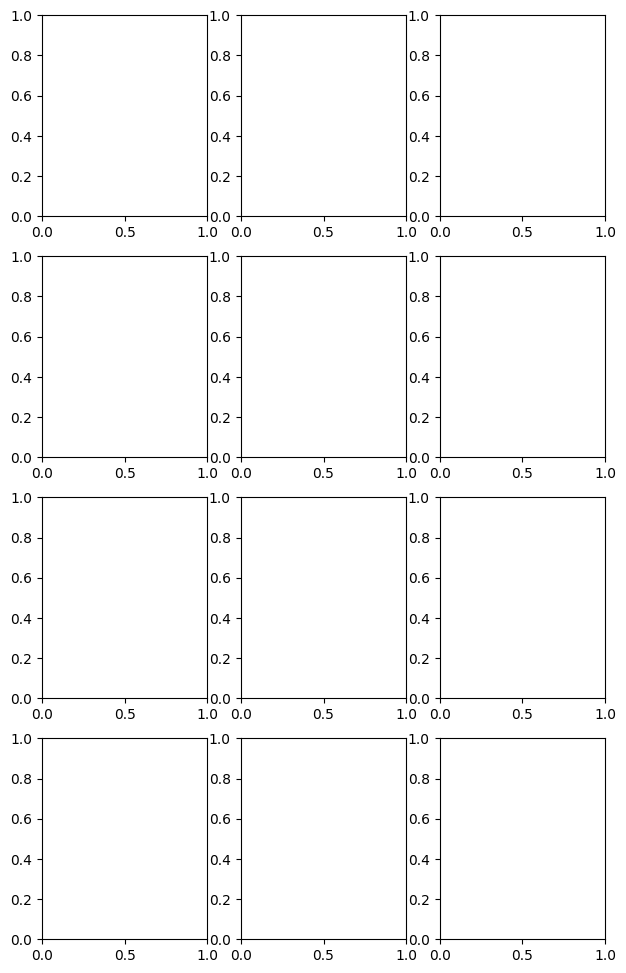

In [ ]:
# import shutil
# import os

# def run_full_analysis(args, vol_data_dict, syn_df, processor):
#     output_dir ='csv2' # Directory to save CSVs
#     os.makedirs(output_dir, exist_ok=True)

#     # Generate images for each seg_type and alpha
#     for seg_type in range(0,9):  # Assuming seg_type 0 and 1
#         for alpha in [0.5,1]:
#             print(f"\nProcessing segmentation_type={seg_type}, alpha={alpha}")

#             # Create dataset for the current seg_type and alpha
#             current_dataset = SynapseDataset(
#                 vol_data_dict=vol_data_dict,
#                 synapse_df=syn_df,
#                 processor=processor,
#                 segmentation_type=seg_type,
#                 subvol_size=args.subvol_size,
#                 num_frames=args.num_frames,
#                 alpha=alpha
#             )

#             # Extract features and save to CSV
#             # csv_filepath = extract_and_save_features(model, current_dataset, args, seg_type, alpha, output_dir)
#             csv_filename = f"/content/drive/MyDrive/csv/features_seg{seg_type}_alpha{str(alpha).replace('.', '_')}.csv"

#             # Load features from the CSV file (for remaining operations)
#             features_df = pd.read_csv(csv_filename)

#             # Create main figure with layout
#             fig = plt.figure(figsize=(20, 12))
#             gs = fig.add_gridspec(1, 2, width_ratios=[4, 6])

#             # Left panel: Image grid (adjust rows/cols if needed)
#             left_gs = gs[0].subgridspec(4, 3)  # 4 rows, 3 cols for 12 images
#             axes = left_gs.subplots()

#             # Plot sample images
#             var1_bbox_to_index = {(syn_info["Var1"], bbox): idx
#                                 for idx, (_, syn_info, bbox) in enumerate(current_dataset)}

#             for ax, sample in zip(axes.flat, fixed_samples):
#                 key = (sample["Var1"], sample["bbox_name"])
#                 if key not in var1_bbox_to_index:
#                     ax.axis('off')
#                     continue
#                 idx = var1_bbox_to_index[key]
#                 pixel_values, syn_info, bbox_name = current_dataset[idx]
#                 original_vol = pixel_values.numpy().transpose(1, 0, 2, 3)
#                 z = sample["slice_number"]
#                 bb = sample["bbox_name"]
#                 ax.imshow(original_vol[0, z], cmap='gray')
#                 ax.set_title(f"ID {sample['id']}: {bb}", fontsize=20)
#                 ax.axis('off')

#             # Right panel: UMAP
#             umap_ax = fig.add_subplot(gs[1])
#             umap_fig = create_plots(features_df, seg_type, alpha, fixed_samples)
#             img_bytes = umap_fig.to_image(format="png", width=1200, height=900)
#             img = Image.open(io.BytesIO(img_bytes))
#             umap_ax.imshow(img)
#             umap_ax.set_title(f"UMAP Projection\nSegType {seg_type}, Alpha {alpha}", fontsize=22)
#             umap_ax.axis('off')

#             plt.tight_layout()

#             # Save as PNG
#             alpha_str = str(alpha).replace('.', '_')
#             filename = f"seg{seg_type}_alpha{alpha_str}.png"
#             fig.savefig(filename, bbox_inches='tight', dpi=300)
#             plt.close(fig)

#             # Copy image to target directory
#             target_dir = '/content/drive/MyDrive/analysis_images4'  # Adjust path as needed
#             os.makedirs(target_dir, exist_ok=True)
#             shutil.copy(filename, target_dir)
#             print(f"Image {filename} copied to {target_dir}")
# run_full_analysis(args, vol_data_dict, syn_df, processor)


# Create sample gifs

In [54]:
!mkdir gifs

In [58]:
bbox_name=['bbox3']
# bbox_name=['bbox1','bbox2','bbox3','bbox4','bbox5','bbox6','bbox7',]

def parse_args():
    parser = argparse.ArgumentParser(description="Synapse Dataset")
    parser.add_argument('--raw_base_dir', type=str, default='raw')
    parser.add_argument('--seg_base_dir', type=str, default='seg')
    parser.add_argument('--add_mask_base_dir', type=str, default='')
    parser.add_argument('--bbox_name', type=str, default=['bbox4'], nargs='+')
    parser.add_argument('--excel_file', type=str, default='')
    parser.add_argument('--csv_output_dir', type=str, default='csv_outputs')
    parser.add_argument('--size', type=tuple, default=(80, 80))
    parser.add_argument('--subvol_size', type=int, default=80)
    parser.add_argument('--num_frames', type=int, default=80)
    parser.add_argument('--save_gifs_dir', type=str, default='gifs')
    parser.add_argument('--alpha', type=float, default=0.7)
    parser.add_argument('--segmentation_type', type=int, default=4, choices=range(0, 13),
                        help='Type of segmentation overlay')
    args, _ = parser.parse_known_args()
    return args
args = parse_args()
# args.bbox_name=['bbox1','bbox2','bbox3','bbox4','bbox5','bbox6','bbox7',]
args.bbox_name=bbox_name
args.segmentation_type=5
# Load volumes
vol_data_dict = {}
for bbox_name in args.bbox_name:
    raw_vol, seg_vol, add_mask_vol = load_volumes(
        bbox_name=bbox_name,
        raw_base_dir=args.raw_base_dir,
        seg_base_dir=args.seg_base_dir,
        add_mask_base_dir=args.add_mask_base_dir
    )
    if raw_vol is not None:
        vol_data_dict[bbox_name] = (raw_vol, seg_vol, add_mask_vol)

# Load synapse data
syn_df = pd.concat([
    pd.read_excel(os.path.join(args.excel_file, f"{bbox}.xlsx")).assign(bbox_name=bbox)
    for bbox in args.bbox_name if os.path.exists(os.path.join(args.excel_file, f"{bbox}.xlsx"))
])

# Initialize model
processor = Synapse3DProcessor(size=args.size)


            # Create dataset and features
dataset = SynapseDataset(
    vol_data_dict=vol_data_dict,
    synapse_df=syn_df,
    processor=processor,
    segmentation_type=args.segmentation_type,
    subvol_size=args.subvol_size,
    num_frames=args.num_frames,
    alpha=0.5
)

# Add unique IDs to fixed_samples
fixed_samples = [
    {"id": 1, "bbox_name": "bbox1", "Var1": "non_spine_synapse_004", "slice_number": 25},
    # {"id": 2, "bbox_name": "bbox1", "Var1": "non_spine_synapse_050", "slice_number": 39},
    {"id": 2, "bbox_name": "bbox1", "Var1": "non_spine_synapse_006", "slice_number": 40},
    # bbox1__5_52.gif
    {"id": 3, "bbox_name": "bbox2", "Var1": "explorative_2024-08-29_Vera_Broens_085", "slice_number": 33},
    {"id": 4, "bbox_name": "bbox2", "Var1": "explorative_2024-08-28_Cora_Wolter_031", "slice_number": 43},
    # bbox3__5_193
    # {"id": 5, "bbox_name": "bbox3", "Var1": "non_spine_synapse_035", "slice_number": 35},
    {"id": 5, "bbox_name": "bbox3", "Var1": "non_spine_synapse_036", "slice_number": 41},
    {"id": 6, "bbox_name": "bbox3", "Var1": "non_spine_synapse_018", "slice_number": 41},
    {"id": 7, "bbox_name": "bbox4", "Var1": "explorative_2024-08-03_Ali_Karimi_022_5_238", "slice_number": 56},
    {"id": 8, "bbox_name": "bbox5", "Var1": "non_spine_synapse_033", "slice_number": 48},
    {"id": 9, "bbox_name": "bbox5", "Var1": "non_spine_synapse_045", "slice_number": 40},
    {"id": 10, "bbox_name": "bbox6", "Var1": "spine_synapse_070", "slice_number": 37},
    {"id": 11, "bbox_name": "bbox6", "Var1": "spine_synapse_021", "slice_number": 30},
    {"id": 12, "bbox_name": "bbox7", "Var1": "non_spine_synapse_013", "slice_number": 25},
]

import os
import numpy as np
import torch
import imageio
    # {"id": 3, "bbox_name": "bbox2", "Var1": "explorative_2024-08-29_Vera_Broens_085", "slice_number": 33},

# فرض بر این است که 'var1' و 'bboxnumber' قبلاً به طور صحیح تعریف شده‌اند
var1 = 'non_spine_synapse_018'  # جایگزین با مقدار واقعی
bboxnumber = 'bbox3'  # جایگزین با مقدار واقعی

# فیلتر کردن داده‌ها بر اساس مقادیر var1 و bbox_name
specific_sample = syn_df[(syn_df['Var1'] == var1) & (syn_df['bbox_name'] == bboxnumber)]

# بررسی اینکه آیا نمونه‌ای پیدا شده است یا خیر
if not specific_sample.empty:
    found = False
    for idx, (pixel_values, syn_info, bbox_name) in enumerate(dataset):
        if bbox_name == bboxnumber and var1 == syn_info['Var1']:  # فرض بر این است که syn_info حاوی اطلاعات var1 است
            print(f"Found matching sample at index {idx}")

            denormalized_cube = pixel_values * torch.tensor([0.229]) + torch.tensor([0.485])  # دنوورمالیزه کردن
            denormalized_cube = torch.clamp(denormalized_cube, 0, 1)  # محدود کردن مقادیر به بازه معتبر
            frames = denormalized_cube.squeeze(1).numpy()  # تبدیل به آرایه NumPy
            # frames = (frames * 255).astype(np.uint8)  # تبدیل به فرمت uint8
            # frames = np.stack([frames, frames, frames], axis=-1)  # ساخت فریم‌های RGB
            Gif_Name = f"{bbox_name}_{var1}_{args.segmentation_type}_{idx}"
            output_gif_path = os.path.join(args.save_gifs_dir, f"{Gif_Name}.gif")
            imageio.mimsave(output_gif_path, frames, fps=10)  # ذخیره به صورت GIF با 10 FPS

            print(f"GIF saved at {output_gif_path}")
            found = True
            break  # زمانی که نمونه پیدا شد، حلقه تمام می‌شود

    if not found:
        print(f"No matching sample found in dataset for Var1={var1} and bbox_name={bboxnumber}")

else:
    print(f"No sample found in syn_df with Var1={var1} and bbox_name={bboxnumber}")


Found matching sample at index 52
GIF saved at gifs/bbox3_non_spine_synapse_018_5_52.gif


In [ ]:
specific_sample

# Clustering Section

# cluster find_closest_samples_in_clusters and Plot TSNE

In [74]:
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import plotly.graph_objects as go
import plotly.express as px
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import pairwise_distances_argmin_min
import imageio
import torch
import os
import glob
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics.pairwise import pairwise_distances_argmin_min


bbox_name=['bbox1','bbox2','bbox3','bbox4','bbox5','bbox6','bbox7',]

def parse_args():
    parser = argparse.ArgumentParser(description="Synapse Dataset")
    parser.add_argument('--raw_base_dir', type=str, default='raw')
    parser.add_argument('--seg_base_dir', type=str, default='seg')
    parser.add_argument('--add_mask_base_dir', type=str, default='')
    parser.add_argument('--bbox_name', type=str, default=['bbox4'], nargs='+')
    parser.add_argument('--excel_file', type=str, default='')
    parser.add_argument('--csv_output_dir', type=str, default='csv_outputs')
    parser.add_argument('--size', type=tuple, default=(80, 80))
    parser.add_argument('--subvol_size', type=int, default=80)
    parser.add_argument('--num_frames', type=int, default=80)
    parser.add_argument('--save_gifs_dir', type=str, default='gifs')
    parser.add_argument('--alpha', type=float, default=0.5)
    parser.add_argument('--segmentation_type', type=int, default=4, choices=range(0, 13),
                        help='Type of segmentation overlay')
    args, _ = parser.parse_known_args()
    return args
args = parse_args()
# args.bbox_name=['bbox1','bbox2','bbox3','bbox4','bbox5','bbox6','bbox7',]
args.bbox_name=bbox_name
args.segmentation_type=5
# Load volumes
vol_data_dict = {}
for bbox_name in args.bbox_name:
    raw_vol, seg_vol, add_mask_vol = load_volumes(
        bbox_name=bbox_name,
        raw_base_dir=args.raw_base_dir,
        seg_base_dir=args.seg_base_dir,
        add_mask_base_dir=args.add_mask_base_dir
    )
    if raw_vol is not None:
        vol_data_dict[bbox_name] = (raw_vol, seg_vol, add_mask_vol)

# Load synapse data
syn_df = pd.concat([
    pd.read_excel(os.path.join(args.excel_file, f"{bbox}.xlsx")).assign(bbox_name=bbox)
    for bbox in args.bbox_name if os.path.exists(os.path.join(args.excel_file, f"{bbox}.xlsx"))
])

# Initialize model
processor = Synapse3DProcessor(size=args.size)


            # Create dataset and features
dataset = SynapseDataset(
    vol_data_dict=vol_data_dict,
    synapse_df=syn_df,
    processor=processor,
    segmentation_type=args.segmentation_type,
    subvol_size=args.subvol_size,
    num_frames=args.num_frames,
    alpha=0.3
)

# Function to load features and perform clustering
def load_and_cluster_features(csv_filepath, n_clusters=5):
    features_df = pd.read_csv(csv_filepath)

    # Extract feature columns (assuming features start with 'feat_')
    feature_cols = [col for col in features_df.columns if col.startswith('feat_')]
    features = features_df[feature_cols].values

    # Perform KMeans clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    features_df['cluster'] = kmeans.fit_predict(features)

    return features_df, kmeans, feature_cols

# Function to find the closest 2 samples within each cluster
def find_closest_samples_in_clusters(features_df, feature_cols, n_samples=2):
    closest_samples = []

    # For each cluster, find the closest 2 samples
    for cluster_id in np.unique(features_df['cluster']):
        cluster_samples = features_df[features_df['cluster'] == cluster_id]
        cluster_features = cluster_samples[feature_cols].values

        # Compute pairwise distances and select the closest pairs
        distances = pairwise_distances_argmin_min(cluster_features, cluster_features)

        # Select the closest pairs (2 closest samples)
        # We assume that distances[0] gives the indices of closest samples within the cluster
        for i, sample_idx in enumerate(distances[0][:n_samples]):
            closest_samples.append(cluster_samples.iloc[sample_idx])

    return closest_samples

# Function to get the center slice of a 3D synapse sample
def get_center_slice(sample):
    """
    Extract the center slice from a 3D sample.
    Assumes the sample is a 3D numpy array.
    """
    # Get the center slice (middle slice in z-direction)
    center_slice = sample[sample.shape[0] // 2, :, :]
    return center_slice

# Function to plot 4 similar samples in a grid for each synapse
def plot_synapse_samples(dataset, closest_samples_indices, title='Synapse Samples'):
    """
    Plots 4 sample images of synapses in a grid layout.
    `dataset` is the dataset containing synapse 3D data.
    `closest_samples_indices` is a list of indices for the samples to plot.
    """
    fig, axes = plt.subplots(1, 4, figsize=(15, 5))  # 1 row, 4 columns

    for i, sample_idx in enumerate(closest_samples_indices):
        # Retrieve the synapse data (3D volume) from the dataset
        pixel_values, syn_info, bbox_name = dataset[sample_idx]  # Assuming dataset[index] gives 3D data

        # Get the center slice of the sample
        center_slice = get_center_slice(pixel_values)
        center_slice=center_slice.squeeze()
        # Plot the slice
        axes[i].imshow(center_slice, cmap='gray')
        axes[i].axis('off')
        axes[i].set_title(f'Sample {i+1}\n({syn_info["bbox_name"]})')

    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

# Function to find 4 closest samples from each cluster
def find_closest_samples_in_clusters(features_df, feature_cols, n_samples=4):
    closest_samples_per_cluster = {}

    # For each cluster, find the closest 4 samples based on feature similarity
    for cluster_id in np.unique(features_df['cluster']):
        cluster_samples = features_df[features_df['cluster'] == cluster_id]
        cluster_features = cluster_samples[feature_cols].values

        # Compute pairwise distances and select the closest pairs
        distances = pairwise_distances_argmin_min(cluster_features, cluster_features)

        # Select the closest samples (4 closest samples)
        closest_samples = []
        for i, sample_idx in enumerate(distances[0][:n_samples]):
            closest_samples.append(cluster_samples.iloc[sample_idx])

        # Store the closest samples for each cluster
        closest_samples_per_cluster[cluster_id] = closest_samples

    return closest_samples_per_cluster
color_mapping = {
    'bbox1': '#FF0000', 'bbox2': '#00FFFF', 'bbox3': '#FFA500',
    'bbox4': '#800080', 'bbox5': '#808080', 'bbox6': '#0000FF', 'bbox7': '#000000'
}

# Function to reduce features to 2D or 3D using t-SNE
def apply_tsne(features_df, feature_cols, n_components=2):
    features = features_df[feature_cols].values
    tsne = TSNE(n_components=n_components, random_state=42)
    tsne_results = tsne.fit_transform(features)
    return tsne_results

# Function to plot 2D and 3D t-SNE
def plot_tsne(features_df, tsne_results_2d, tsne_results_3d, kmeans, color_mapping):
    # 2D Plot colored by `bbox_name`
    fig_2d = px.scatter(
        features_df,
        x=tsne_results_2d[:, 0],
        y=tsne_results_2d[:, 1],
        color=features_df['bbox_name'],
        color_discrete_map=color_mapping,
        labels={'x': 't-SNE 1', 'y': 't-SNE 2'},
        title='2D t-SNE colored by bbox_name'
    )
    fig_2d.update_traces(marker=dict(size=4))  # Set the size of points to 2

    fig_2d.show()

    # 2D Plot colored by `cluster`
    fig_2d_cluster = px.scatter(
        features_df,
        x=tsne_results_2d[:, 0],
        y=tsne_results_2d[:, 1],
        color=kmeans.labels_.astype(str),  # Color by cluster number
        labels={'x': 't-SNE 1', 'y': 't-SNE 2'},
        title='2D t-SNE colored by cluster'
    )
    fig_2d_cluster.update_traces(marker=dict(size=4))  # Set the size of points to 2

    fig_2d_cluster.show()

csv_files = [
    # 'features_seg0_alpha0_5.csv', 'features_seg0_alpha1.csv',
    'features_seg1_alpha0_5.csv', 'features_seg1_alpha1.csv',
    # 'features_seg2_alpha0_5.csv', 'features_seg2_alpha1.csv',
    # 'features_seg3_alpha0_5.csv', 'features_seg3_alpha1.csv',
    # 'features_seg4_alpha0_5.csv', 'features_seg4_alpha1.csv',
    # 'features_seg5_alpha0_5.csv', 'features_seg5_alpha1.csv',
    # 'features_seg6_alpha0_5.csv', 'features_seg6_alpha1.csv',
    # 'features_seg7_alpha0_5.csv', 'features_seg7_alpha1.csv',
    # 'features_seg8_alpha0_5.csv', 'features_seg8_alpha1.csv',
    'features_seg9_alpha0_5.csv', 'features_seg9_alpha1.csv',
    'features_seg10_alpha0_5.csv', 'features_seg10_alpha1.csv',
]

# csv_files = [
#      'features_seg1_alpha1.csv',
# ]
# Add this near your other imports
from pathlib import Path

# Modify your processing loop
for csv_file in csv_files:
    csv_filepath = os.path.join('/content/drive/MyDrive/csv10', csv_file)

    print(f"Processing {csv_file}")

    # Create output directory for this iteration
    iteration_name = Path(csv_file).stem  # Remove .csv extension
    output_dir = Path("clustering_results_final") / iteration_name
    output_dir.mkdir(parents=True, exist_ok=True)

    # Step 1: Load and cluster features
    n_clusters = 10
    features_df, kmeans, feature_cols = load_and_cluster_features(csv_filepath, n_clusters)

    # Save clustered features
    features_df.to_csv(output_dir / "clustered_features.csv", index=False)

    # Step 2: Apply t-SNE
    tsne_results_2d = apply_tsne(features_df, feature_cols, 2)
    tsne_results_3d = apply_tsne(features_df, feature_cols, 3)

    # Step 3: Modified plotting function to save images
    def save_tsne_plots(features_df, tsne_results_2d, tsne_results_3d, kmeans, color_mapping, output_dir):
        # 2D Plot colored by bbox_name
        fig_2d = px.scatter(
            features_df,
            x=tsne_results_2d[:, 0],
            y=tsne_results_2d[:, 1],
            color=features_df['bbox_name'],
            color_discrete_map=color_mapping,
            title='2D t-SNE colored by bbox_name'
        )
        fig_2d.update_traces(marker=dict(size=4))  # Set the size of points to 2

        fig_2d.write_image(output_dir / "tsne_2d_bbox.png")

        # 2D Plot colored by cluster
        fig_cluster = px.scatter(
            features_df,
            x=tsne_results_2d[:, 0],
            y=tsne_results_2d[:, 1],
            color=kmeans.labels_.astype(str),
            title='2D t-SNE colored by cluster'
        )
        fig_cluster.update_traces(marker=dict(size=4))  # Set the size of points to 2

        fig_cluster.write_image(output_dir / "tsne_2d_cluster.png")

        # 3D Plot
        if tsne_results_3d is not None:
            fig_3d = px.scatter_3d(
                features_df,
                x=tsne_results_3d[:, 0],
                y=tsne_results_3d[:, 1],
                z=tsne_results_3d[:, 2],
                color=kmeans.labels_.astype(str),
                title='3D t-SNE'
            )
            fig_cluster.update_traces(marker=dict(size=2))  # Set the size of points to 2

            fig_3d.write_html(output_dir / "tsne_3d.html")


    save_tsne_plots(features_df, tsne_results_2d, tsne_results_3d, kmeans, color_mapping, output_dir)

    # Step 4: Find and save closest samples
    closest_samples_per_cluster = find_closest_samples_in_clusters(features_df, feature_cols, 4)

    # Modified plotting function to save samples
    def save_cluster_samples(dataset, closest_samples_per_cluster, output_dir):
        for cluster_id, samples in closest_samples_per_cluster.items():
            fig, axes = plt.subplots(1, 4, figsize=(15, 5))
            for i, sample in enumerate(samples):
                pixel_values, syn_info, bbox_name = dataset[sample.name]
                center_slice = pixel_values[pixel_values.shape[0] // 2, :, :].squeeze()
                axes[i].imshow(center_slice, cmap='gray')
                axes[i].axis('off')
                axes[i].set_title(f'Sample {i+1}\n({syn_info["bbox_name"]})')
            plt.suptitle(f'Cluster {cluster_id} Samples')
            plt.tight_layout()
            plt.savefig(output_dir / f'cluster_{cluster_id}_samples.png')
            plt.close()

    save_cluster_samples(dataset, closest_samples_per_cluster, output_dir)

    print(f"Saved results to {output_dir}")



Processing features_seg1_alpha0_5.csv
Saved results to clustering_results_final/features_seg1_alpha0_5
Processing features_seg1_alpha1.csv
Saved results to clustering_results_final/features_seg1_alpha1
Processing features_seg9_alpha0_5.csv
Saved results to clustering_results_final/features_seg9_alpha0_5
Processing features_seg9_alpha1.csv
Saved results to clustering_results_final/features_seg9_alpha1
Processing features_seg10_alpha0_5.csv
Saved results to clustering_results_final/features_seg10_alpha0_5
Processing features_seg10_alpha1.csv
Saved results to clustering_results_final/features_seg10_alpha1


In [75]:


import shutil
import os
from pathlib import Path

!zip -r /content/clustering_results_final.zip /content/clustering_results_final

# Copy image to target directory
target_dir = '/content/drive/MyDrive/analysis_images10'  # Adjust path as needed
os.makedirs(target_dir, exist_ok=True)
shutil.copy('/content/clustering_results_final.zip', target_dir)


  adding: content/clustering_results_final/ (stored 0%)
  adding: content/clustering_results_final/features_seg9_alpha0_5/ (stored 0%)
  adding: content/clustering_results_final/features_seg9_alpha0_5/tsne_2d_bbox.png (deflated 8%)
  adding: content/clustering_results_final/features_seg9_alpha0_5/cluster_5_samples.png (deflated 11%)
  adding: content/clustering_results_final/features_seg9_alpha0_5/cluster_9_samples.png (deflated 11%)
  adding: content/clustering_results_final/features_seg9_alpha0_5/cluster_2_samples.png (deflated 11%)
  adding: content/clustering_results_final/features_seg9_alpha0_5/cluster_4_samples.png (deflated 12%)
  adding: content/clustering_results_final/features_seg9_alpha0_5/cluster_1_samples.png (deflated 12%)
  adding: content/clustering_results_final/features_seg9_alpha0_5/tsne_3d.html (deflated 70%)
  adding: content/clustering_results_final/features_seg9_alpha0_5/clustered_features.csv (deflated 76%)
  adding: content/clustering_results_final/features_seg

NameError: name 'filename' is not defined

# Analyze clusters mask sizes

# Analyze clusters mask sizes

In [7]:
!cp /content/drive/MyDrive/ves_sizes.zip /content
!unzip ves_sizes.zip

Archive:  ves_sizes.zip
   creating: content/csv_outputs/
  inflating: content/csv_outputs/bbox2.csv  
  inflating: content/csv_outputs/features_seg10_alpha1.csv  
  inflating: content/csv_outputs/bbox5.csv  
  inflating: content/csv_outputs/bbox6.csv  
  inflating: content/csv_outputs/bbox7.csv  
  inflating: content/csv_outputs/bbox3.csv  
  inflating: content/csv_outputs/bbox4.csv  
  inflating: content/csv_outputs/features_seg9_alpha1.csv  
  inflating: content/csv_outputs/features_seg1_alpha0_5.csv  
  inflating: content/csv_outputs/bbox1.csv  
  inflating: content/csv_outputs/features_seg1_alpha1.csv  
  inflating: content/csv_outputs/features_seg10_alpha0_5.csv  
  inflating: content/csv_outputs/features_seg9_alpha0_5.csv  


In [ ]:
!pip install ace_tools

In [76]:
# ... (existing imports and code)

def get_vesicle_label(bbox_name):
    """Determine vesicle label based on bbox name."""
    bbox_num = bbox_name.replace("bbox", "").strip()
    if bbox_num in {'2', '5'}:
        return 3
    elif bbox_num == '7':
        return 2
    elif bbox_num == '4':
        return 2
    elif bbox_num == '3':
        return 7
    else:  # For bbox1, 6, etc.
        return 6

def calculate_vesicle_cloud_size(row, vol_data_dict, subvol_size):
    """Calculate the vesicle cloud mask size for a given synapse row."""
    bbox_name = row['bbox_name']
    if bbox_name not in vol_data_dict:
        return 0  # Handle missing data

    add_mask_vol = vol_data_dict[bbox_name][2]  # Get vesicle segmentation volume
    vesicle_label = get_vesicle_label(bbox_name)

    # Extract coordinates from the dataframe (x, y, z)
    cx, cy, cz = (
        int(row['central_coord_1']),
        int(row['central_coord_2']),
        int(row['central_coord_3'])
    )

    # Calculate subvolume bounds
    half_size = subvol_size // 2
    x_start = max(cx - half_size, 0)
    x_end = min(cx + half_size, add_mask_vol.shape[2])
    y_start = max(cy - half_size, 0)
    y_end = min(cy + half_size, add_mask_vol.shape[1])
    z_start = max(cz - half_size, 0)
    z_end = min(cz + half_size, add_mask_vol.shape[0])

    # Generate full vesicle mask and find closest component
    vesicle_full_mask = (add_mask_vol == vesicle_label)
    vesicle_mask = get_closest_component_mask(
        vesicle_full_mask,
        z_start, z_end,
        y_start, y_end,
        x_start, x_end,
        (cx, cy, cz)
    )

    return np.sum(vesicle_mask)  # Total pixels in the vesicle cloud

# After loading the synapse dataframe (syn_df), add the following:

# Compute vesicle cloud size for each synapse
print("Calculating vesicle cloud sizes...")
syn_df['vesicle_cloud_size'] = syn_df.apply(
    lambda row: calculate_vesicle_cloud_size(row, vol_data_dict, args.subvol_size),
    axis=1
)

# Ensure output directory exists
os.makedirs(args.csv_output_dir, exist_ok=True)

# Save each bbox's dataframe with the new column
for bbox in args.bbox_name:
    bbox_df = syn_df[syn_df['bbox_name'] == bbox]
    if not bbox_df.empty:
        output_path = os.path.join(args.csv_output_dir, f"{bbox}.csv")
        bbox_df.to_csv(output_path, index=False)
        print(f"Saved {output_path} with vesicle cloud sizes.")

# ... (remaining existing code)

Calculating vesicle cloud sizes...


KeyboardInterrupt: 

In [ ]:
# prompt: zip this folder /content/results2

import shutil
import os
from pathlib import Path

!zip -r /content/ves_sizes.zip /content/csv_outputs


  adding: content/csv_outputs/ (stored 0%)
  adding: content/csv_outputs/bbox2.csv (deflated 73%)
  adding: content/csv_outputs/features_seg10_alpha1.csv (deflated 81%)
  adding: content/csv_outputs/bbox5.csv (deflated 67%)
  adding: content/csv_outputs/bbox6.csv (deflated 67%)
  adding: content/csv_outputs/bbox7.csv (deflated 68%)
  adding: content/csv_outputs/bbox3.csv (deflated 68%)
  adding: content/csv_outputs/bbox4.csv (deflated 72%)
  adding: content/csv_outputs/features_seg9_alpha1.csv (deflated 81%)
  adding: content/csv_outputs/features_seg1_alpha0_5.csv (deflated 82%)
  adding: content/csv_outputs/bbox1.csv (deflated 68%)
  adding: content/csv_outputs/features_seg1_alpha1.csv (deflated 81%)
  adding: content/csv_outputs/features_seg10_alpha0_5.csv (deflated 82%)
  adding: content/csv_outputs/features_seg9_alpha0_5.csv (deflated 80%)


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob

# Load the clustered features
features_path = "/content/clustering_results_presynapse/features_seg1_alpha1/clustered_features.csv"
features_df = pd.read_csv(features_path)

# Load all bbox CSVs with vesicle cloud sizes
bbox_csvs = glob('/content/content/csv_outputs/bbox*.csv')
vesicle_df = pd.concat([pd.read_csv(f) for f in bbox_csvs])

# Merge features with vesicle sizes on unique identifiers
# Ensure the merge keys match your data's columns
merged_df = pd.merge(
    features_df,
    vesicle_df[['bbox_name', 'central_coord_1', 'central_coord_2', 'central_coord_3', 'vesicle_cloud_size']],
    on=['bbox_name', 'central_coord_1', 'central_coord_2', 'central_coord_3']
)

# Calculate cluster statistics
cluster_stats = merged_df.groupby('cluster')['vesicle_cloud_size'].agg(
    mean_size='mean',
    median_size='median',
    std_size='std',
    count='count'
)
print("Cluster Statistics:")
print(cluster_stats)
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from glob import glob
import numpy as np
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from umap import UMAP
import statsmodels.api as sm
import shap
import os
from scipy.stats import gaussian_kde

# Ensure the folder to save the HTML file exists
os.makedirs('output_html', exist_ok=True)

# Merge datasets using composite key
merged_df = pd.merge(
    features_df,
    vesicle_df[['bbox_name', 'central_coord_1', 'central_coord_2',
                'central_coord_3', 'vesicle_cloud_size']],
    on=['bbox_name', 'central_coord_1', 'central_coord_2', 'central_coord_3'],
    how='inner'
)

# Create meaningful size categories
merged_df['size_category'] = pd.qcut(merged_df['vesicle_cloud_size'],
                                    q=4,
                                    labels=['Small', 'Medium', 'Large', 'X-Large'])

# 2. Plotting and Table Generation
# Box Plot
fig_box = px.box(
    merged_df,
    x='cluster',
    y='vesicle_cloud_size',
    color='cluster',
    points="all",
    hover_data=['bbox_name'],
    title="Vesicle Cloud Size Distribution by Cluster"
)

# Add mean markers
means = merged_df.groupby('cluster')['vesicle_cloud_size'].mean()
fig_box.add_trace(go.Scatter(
    x=means.index,
    y=means.values,
    mode='markers',
    marker=dict(color='black', size=10, symbol='x'),
    name='Mean'
))

# Violin Plot
fig_violin = go.Figure()
for cluster in sorted(merged_df['cluster'].unique()):
    fig_violin.add_trace(go.Violin(
        x=merged_df[merged_df['cluster'] == cluster]['cluster'],
        y=merged_df[merged_df['cluster'] == cluster]['vesicle_cloud_size'],
        name=f'Cluster {cluster}',
        box_visible=True,
        meanline_visible=True
    ))

# Statistical Summary Table
stats_df = merged_df.groupby('cluster')['vesicle_cloud_size'].agg(
    Mean=np.mean,
    Median=np.median,
    Std=np.std,
    Min=np.min,
    Max=np.max,
    Count='count'
).reset_index()

fig_table = go.Figure(data=[go.Table(
    header=dict(values=stats_df.columns.tolist()),
    cells=dict(values=stats_df.values.T))
])

# Enhanced Violin Plot with Distribution Metrics
fig_enhanced_violin = go.Figure()
for cluster in sorted(merged_df['cluster'].unique()):
    cluster_data = merged_df[merged_df['cluster'] == cluster]

    # Add violin plot
    fig_enhanced_violin.add_trace(go.Violin(
        x=cluster_data['cluster'],
        y=cluster_data['vesicle_cloud_size'],
        name=f'Cluster {cluster}',
        box_visible=True,
        meanline_visible=True,
        points="all",
        pointpos=0,
        jitter=0.05
    ))

    # Add statistical annotations
    stats_text = (f"Mean: {cluster_data['vesicle_cloud_size'].mean():.1f}<br>"
                  f"Median: {cluster_data['vesicle_cloud_size'].median():.1f}<br>"
                  f"SD: {cluster_data['vesicle_cloud_size'].std():.1f}")

    fig_enhanced_violin.add_annotation(
        x=cluster,
        y=cluster_data['vesicle_cloud_size'].max() * 1.1,
        text=stats_text,
        showarrow=False,
        font=dict(size=9)
    )

# Statistical Comparison Matrix
clusters = sorted(merged_df['cluster'].unique())
effect_size_matrix = np.zeros((len(clusters), len(clusters)))

for i, cluster1 in enumerate(clusters):
    for j, cluster2 in enumerate(clusters):
        if i != j:
            data1 = merged_df[merged_df['cluster'] == cluster1]['vesicle_cloud_size']
            data2 = merged_df[merged_df['cluster'] == cluster2]['vesicle_cloud_size']
            effect_size = (data1.mean() - data2.mean()) / np.sqrt((data1.std()**2 + data2.std()**2)/2)
            effect_size_matrix[i, j] = effect_size

# Create heatmap for effect sizes
fig_effect_size = go.Figure(data=go.Heatmap(
    z=effect_size_matrix,
    x=clusters,
    y=clusters,
    colorscale='RdBu',
    zmid=0,
    colorbar=dict(title="Cohen's d"),
    hoverongaps=False
))

# Add annotations for effect sizes
annotations = []
for i, cluster1 in enumerate(clusters):
    for j, cluster2 in enumerate(clusters):
        annotations.append(
            dict(
                x=cluster2,
                y=cluster1,
                text=f"{effect_size_matrix[i, j]:.2f}",
                showarrow=False,
                font=dict(color='white' if abs(effect_size_matrix[i, j]) > 0.5 else 'black')
            )
        )

fig_effect_size.update_layout(
    title="Pairwise Effect Size Comparison (Cohen's d)",
    xaxis_title="Cluster",
    yaxis_title="Cluster",
    annotations=annotations,
    width=800,
    height=800
)

# Cumulative Distribution Plot
fig_cdf = go.Figure()
for cluster in sorted(merged_df['cluster'].unique()):
    cluster_data = merged_df[merged_df['cluster'] == cluster]['vesicle_cloud_size']
    hist, bin_edges = np.histogram(cluster_data, bins=50, density=True)
    cdf = np.cumsum(hist * np.diff(bin_edges))

    fig_cdf.add_trace(go.Scatter(
        x=bin_edges[1:],
        y=cdf,
        mode='lines',
        name=f'Cluster {cluster}',
        opacity=0.7
    ))

# Topological Manifold Learning with UMAP
umap_3d = UMAP(n_components=3, random_state=42)
features = merged_df.filter(regex='feat_').values
projection_3d = umap_3d.fit_transform(features)

fig_umap = px.scatter_3d(
    merged_df,
    x=projection_3d[:,0],
    y=projection_3d[:,1],
    z=projection_3d[:,2],
    color='cluster',
    size='vesicle_cloud_size',
    hover_data=['size_category'],
    title="3D Topological Manifold with Cluster & Size Projection",
    opacity=0.7
)
fig_umap.update_layout(width=1200, height=800)

# Bayesian Hierarchical Modeling
mixed_model = sm.MixedLM.from_formula(
    'vesicle_cloud_size ~ cluster',
    groups=merged_df['bbox_name'],
    data=merged_df
).fit()

# Advanced Distribution Comparison (Kernel Density Estimation)
fig_kde = go.Figure()
for cluster in clusters:
    data = merged_df[merged_df['cluster'] == cluster]['vesicle_cloud_size']
    kernel = gaussian_kde(data)
    x = np.linspace(data.min(), data.max(), 100)
    fig_kde.add_trace(go.Scatter(
        x=x,
        y=kernel(x),
        mode='lines',
        name=f'Cluster {cluster}',
        fill='tozeroy'
    ))

# 3. Write everything to an HTML file
html_filename = "output_html/analysis_results.html"
with open(html_filename, 'w') as f:
    f.write("<html><body><h1>Analysis Results</h1><hr>")
    f.write("<h2>Vesicle Cloud Size Distribution by Cluster</h2>")
    f.write(fig_box.to_html(full_html=False, include_plotlyjs='cdn'))
    f.write("<h2>Violin Plots of Vesicle Size Distributions per Cluster</h2>")
    f.write(fig_violin.to_html(full_html=False, include_plotlyjs='cdn'))
    f.write("<h2>Statistical Summary by Cluster</h2>")
    f.write(fig_table.to_html(full_html=False, include_plotlyjs='cdn'))
    f.write("<h2>Enhanced Violin Plots with Distribution Metrics</h2>")
    f.write(fig_enhanced_violin.to_html(full_html=False, include_plotlyjs='cdn'))
    f.write("<h2>Pairwise Effect Size Comparison (Cohen's d)</h2>")
    f.write(fig_effect_size.to_html(full_html=False, include_plotlyjs='cdn'))
    f.write("<h2>Cumulative Distribution Functions by Cluster</h2>")
    f.write(fig_cdf.to_html(full_html=False, include_plotlyjs='cdn'))
    f.write("<h2>3D Topological Manifold with Cluster & Size Projection</h2>")
    f.write(fig_umap.to_html(full_html=False, include_plotlyjs='cdn'))
    f.write("<h2>Advanced Distribution Comparison (Kernel Density Estimation)</h2>")
    f.write(fig_kde.to_html(full_html=False, include_plotlyjs='cdn'))
    f.write("<h2>Bayesian Hierarchical Modeling Summary</h2>")
    f.write(f"<pre>{mixed_model.summary()}</pre>")
    f.write("<hr></body></html>")

print(f"HTML file saved to {html_filename}")


Cluster Statistics:
            mean_size  median_size      std_size  count
cluster                                                
0        17074.492063      15087.0  13275.508150     63
1        25296.878788      19922.0  21165.778431     66
2        19702.634615       9382.0  24112.898716     52
3         5711.851852          9.0  12797.283524     27
4        24744.236559      15368.0  25472.189837     93
5        17633.608696      15602.5  15101.639561     46
6        29630.687500      29620.0  20293.481207     32
7        25294.890625      22859.0  19067.368575     64
8        17438.551724      11867.0  16841.876593     29
9        21758.216216      13183.0  20153.947448     37


In [82]:
import os
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from glob import glob
import numpy as np
from scipy.stats import gaussian_kde
from umap import UMAP
import statsmodels.api as sm

# Base directory where the features are stored
base_dir = '/content/clustering_results_final/'

# Ensure the folder to save the HTML files exists
os.makedirs('output_html', exist_ok=True)

# Iterate over all combinations of seg and alpha
segments = [1, 9, 10]
alphas = ['0_5', 1]

for seg in segments:
    for alpha in alphas:
        # Construct the path to the clustered features CSV file
        features_path = os.path.join(base_dir, f"features_seg{seg}_alpha{alpha}", 'clustered_features.csv')

        if os.path.exists(features_path):
            print(f"Processing file: {features_path}")

            # Load the clustered features for the current CSV file
            features_df = pd.read_csv(features_path)

            # Load all bbox CSVs with vesicle cloud sizes
            bbox_csvs = glob('/content/content/csv_outputs/bbox*.csv')
            vesicle_df = pd.concat([pd.read_csv(f) for f in bbox_csvs])

            # Merge datasets using composite key
            merged_df = pd.merge(
                features_df,
                vesicle_df[['bbox_name', 'central_coord_1', 'central_coord_2',
                            'central_coord_3', 'vesicle_cloud_size']],
                on=['bbox_name', 'central_coord_1', 'central_coord_2', 'central_coord_3'],
                how='inner'
            )

            # Create meaningful size categories
            merged_df['size_category'] = pd.qcut(merged_df['vesicle_cloud_size'],
                                                q=4,
                                                labels=['Small', 'Medium', 'Large', 'X-Large'])

            # Cluster statistics
            cluster_stats = merged_df.groupby('cluster')['vesicle_cloud_size'].agg(
                mean_size='mean',
                median_size='median',
                std_size='std',
                count='count'
            )
            print("Cluster Statistics:")
            print(cluster_stats)

            # Box Plot
            fig_box = px.box(
                merged_df,
                x='cluster',
                y='vesicle_cloud_size',
                color='cluster',
                points="all",
                hover_data=['bbox_name'],
                title=f"Vesicle Cloud Size Distribution by Cluster (seg{seg}_alpha{alpha})"
            )

            # Violin Plot
            fig_violin = go.Figure()
            for cluster in sorted(merged_df['cluster'].unique()):
                fig_violin.add_trace(go.Violin(
                    x=merged_df[merged_df['cluster'] == cluster]['cluster'],
                    y=merged_df[merged_df['cluster'] == cluster]['vesicle_cloud_size'],
                    name=f'Cluster {cluster}',
                    box_visible=True,
                    meanline_visible=True
                ))

            # Statistical Summary Table
            stats_df = merged_df.groupby('cluster')['vesicle_cloud_size'].agg(
                Mean=np.mean,
                Median=np.median,
                Std=np.std,
                Min=np.min,
                Max=np.max,
                Count='count'
            ).reset_index()

            fig_table = go.Figure(data=[go.Table(
                header=dict(values=stats_df.columns.tolist()),
                cells=dict(values=stats_df.values.T))
            ])

            # Enhanced Violin Plot with Distribution Metrics
            fig_enhanced_violin = go.Figure()
            for cluster in sorted(merged_df['cluster'].unique()):
                cluster_data = merged_df[merged_df['cluster'] == cluster]

                # Add violin plot
                fig_enhanced_violin.add_trace(go.Violin(
                    x=cluster_data['cluster'],
                    y=cluster_data['vesicle_cloud_size'],
                    name=f'Cluster {cluster}',
                    box_visible=True,
                    meanline_visible=True,
                    points="all",
                    pointpos=0,
                    jitter=0.05
                ))

                # Add statistical annotations
                stats_text = (f"Mean: {cluster_data['vesicle_cloud_size'].mean():.1f}<br>"
                              f"Median: {cluster_data['vesicle_cloud_size'].median():.1f}<br>"
                              f"SD: {cluster_data['vesicle_cloud_size'].std():.1f}")

                fig_enhanced_violin.add_annotation(
                    x=cluster,
                    y=cluster_data['vesicle_cloud_size'].max() * 1.1,
                    text=stats_text,
                    showarrow=False,
                    font=dict(size=9)
                )

            # Statistical Comparison Matrix (Effect Size)
            clusters = sorted(merged_df['cluster'].unique())
            effect_size_matrix = np.zeros((len(clusters), len(clusters)))

            for i, cluster1 in enumerate(clusters):
                for j, cluster2 in enumerate(clusters):
                    if i != j:
                        data1 = merged_df[merged_df['cluster'] == cluster1]['vesicle_cloud_size']
                        data2 = merged_df[merged_df['cluster'] == cluster2]['vesicle_cloud_size']
                        effect_size = (data1.mean() - data2.mean()) / np.sqrt((data1.std()**2 + data2.std()**2)/2)
                        effect_size_matrix[i, j] = effect_size

            # Create heatmap for effect sizes
            fig_effect_size = go.Figure(data=go.Heatmap(
                z=effect_size_matrix,
                x=clusters,
                y=clusters,
                colorscale='RdBu',
                zmid=0,
                colorbar=dict(title="Cohen's d"),
                hoverongaps=False
            ))

            # Add annotations for effect sizes
            annotations = []
            for i, cluster1 in enumerate(clusters):
                for j, cluster2 in enumerate(clusters):
                    annotations.append(
                        dict(
                            x=cluster2,
                            y=cluster1,
                            text=f"{effect_size_matrix[i, j]:.2f}",
                            showarrow=False,
                            font=dict(color='white' if abs(effect_size_matrix[i, j]) > 0.5 else 'black')
                        )
                    )

            fig_effect_size.update_layout(
                title=f"Pairwise Effect Size Comparison (Cohen's d) (seg{seg}_alpha{alpha})",
                xaxis_title="Cluster",
                yaxis_title="Cluster",
                annotations=annotations,
                width=800,
                height=800
            )

            # 3D UMAP Projection
            umap_3d = UMAP(n_components=3, random_state=42)
            features = merged_df.filter(regex='feat_').values
            projection_3d = umap_3d.fit_transform(features)

            fig_umap = px.scatter_3d(
                merged_df,
                x=projection_3d[:,0],
                y=projection_3d[:,1],
                z=projection_3d[:,2],
                color='cluster',
                size='vesicle_cloud_size',
                hover_data=['size_category'],
                title=f"3D Topological Manifold with Cluster & Size Projection (seg{seg}_alpha{alpha})",
                opacity=0.7
            )
            fig_umap.update_layout(width=1200, height=800)

            # Save HTML for each combination of seg and alpha
            html_filename = f"output_html/seg{seg}_alpha{alpha}_analysis_results.html"
            with open(html_filename, 'w') as f:
                f.write("<html><body><h1>Analysis Results</h1><hr>")
                f.write(f"<h2>Vesicle Cloud Size Distribution by Cluster (seg{seg}_alpha{alpha})</h2>")
                f.write(fig_box.to_html(full_html=False, include_plotlyjs='cdn'))
                f.write("<h2>Violin Plots of Vesicle Size Distributions per Cluster</h2>")
                f.write(fig_violin.to_html(full_html=False, include_plotlyjs='cdn'))
                f.write("<h2>Statistical Summary by Cluster</h2>")
                f.write(fig_table.to_html(full_html=False, include_plotlyjs='cdn'))
                f.write("<h2>Enhanced Violin Plots with Distribution Metrics</h2>")
                f.write(fig_enhanced_violin.to_html(full_html=False, include_plotlyjs='cdn'))
                f.write("<h2>Pairwise Effect Size Comparison (Cohen's d)</h2>")
                f.write(fig_effect_size.to_html(full_html=False, include_plotlyjs='cdn'))
                f.write("<h2>3D Topological Manifold with Cluster & Size Projection</h2>")
                f.write(fig_umap.to_html(full_html=False, include_plotlyjs='cdn'))
                f.write("<hr></body></html>")

            print(f"HTML file saved to {html_filename}")


Processing file: /content/clustering_results_final/features_seg1_alpha0_5/clustered_features.csv
Cluster Statistics:
            mean_size  median_size      std_size  count
cluster                                                
0        20533.380000      17601.5  16422.117295     50
1        16862.692308      10172.0  15732.778725     52
2        16280.977273       9232.0  17616.975996     44
3        34797.782609      19641.5  34158.304532     46
4        29108.237288      31346.0  21123.349318     59
5        14994.816327      13885.0  10361.169475     98
6        32576.750000      24048.5  29729.880462     20
7        13963.017544       7899.0  15905.343274     57
8        25676.900000      24512.5  19682.685851     20
9        24536.476190      22285.0  20253.169844     63


<ipython-input-82-d5a537227248>:83: FutureWarning:

The provided callable <function mean at 0x7e643190db20> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.

<ipython-input-82-d5a537227248>:83: FutureWarning:

The provided callable <function median at 0x7e6431356200> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.

<ipython-input-82-d5a537227248>:83: FutureWarning:

The provided callable <function std at 0x7e643190dc60> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.

<ipython-input-82-d5a537227248>:83: FutureWarning:

The provided callable <function min at 0x7e643190d260> is currently using SeriesGroupBy.min. In a futu

HTML file saved to output_html/seg1_alpha0_5_analysis_results.html
Processing file: /content/clustering_results_final/features_seg1_alpha1/clustered_features.csv
Cluster Statistics:
            mean_size  median_size      std_size  count
cluster                                                
0        15957.380952      14755.0  12705.915671     63
1        34466.266667      35181.0  24175.974142     60
2        27030.028571      21435.0  20246.307517     35
3        27888.020408      27139.0  21305.578062     49
4        15590.946429       8962.5  16722.763008     56
5        14491.955556      10268.0  13525.606782     45
6        27767.809524      26647.0  19721.404442     21
7        16373.056180      13964.0  12743.100774     89
8        28276.186441      17597.0  31320.143868     59
9         9203.875000       4591.0  11119.986417     32


<ipython-input-82-d5a537227248>:83: FutureWarning:

The provided callable <function mean at 0x7e643190db20> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.

<ipython-input-82-d5a537227248>:83: FutureWarning:

The provided callable <function median at 0x7e6431356200> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.

<ipython-input-82-d5a537227248>:83: FutureWarning:

The provided callable <function std at 0x7e643190dc60> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.

<ipython-input-82-d5a537227248>:83: FutureWarning:

The provided callable <function min at 0x7e643190d260> is currently using SeriesGroupBy.min. In a futu

HTML file saved to output_html/seg1_alpha1_analysis_results.html
Processing file: /content/clustering_results_final/features_seg9_alpha0_5/clustered_features.csv
Cluster Statistics:
            mean_size  median_size      std_size  count
cluster                                                
0        16050.235294      15729.0  11217.009827     51
1        48083.225806      44467.0  35578.701698     31
2        23322.779661      18221.0  20217.137788     59
3        16094.114583      12360.5  14315.240023     96
4        28502.900000      27423.0  19143.275222     30
5        11833.372881       5147.0  16248.596537     59
6        14952.773585      10492.0  15168.865986     53
7        36995.058824      36540.5  23605.858624     34
8        25483.375000      26389.0  26174.004016     16
9        20908.637500      16909.0  15211.899723     80


<ipython-input-82-d5a537227248>:83: FutureWarning:

The provided callable <function mean at 0x7e643190db20> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.

<ipython-input-82-d5a537227248>:83: FutureWarning:

The provided callable <function median at 0x7e6431356200> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.

<ipython-input-82-d5a537227248>:83: FutureWarning:

The provided callable <function std at 0x7e643190dc60> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.

<ipython-input-82-d5a537227248>:83: FutureWarning:

The provided callable <function min at 0x7e643190d260> is currently using SeriesGroupBy.min. In a futu

HTML file saved to output_html/seg9_alpha0_5_analysis_results.html
Processing file: /content/clustering_results_final/features_seg9_alpha1/clustered_features.csv
Cluster Statistics:
            mean_size  median_size      std_size  count
cluster                                                
0        21424.675000      21216.5  11770.148256     40
1        35654.272727      38083.0  22273.160279     55
2        17826.411765      16077.0  11159.065722     68
3        10343.328571       8659.5   8978.514965     70
4         6672.962963       5239.0   4880.989348     54
5        24480.725490      22155.0  17443.333147     51
6         6709.317460       5464.0   5189.638392     63
7        65733.304348      58611.0  24348.487858     23
8        39324.142857      38922.0  28339.470065     35
9        24805.500000      22832.0  13093.200704     50


<ipython-input-82-d5a537227248>:83: FutureWarning:

The provided callable <function mean at 0x7e643190db20> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.

<ipython-input-82-d5a537227248>:83: FutureWarning:

The provided callable <function median at 0x7e6431356200> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.

<ipython-input-82-d5a537227248>:83: FutureWarning:

The provided callable <function std at 0x7e643190dc60> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.

<ipython-input-82-d5a537227248>:83: FutureWarning:

The provided callable <function min at 0x7e643190d260> is currently using SeriesGroupBy.min. In a futu

HTML file saved to output_html/seg9_alpha1_analysis_results.html
Processing file: /content/clustering_results_final/features_seg10_alpha0_5/clustered_features.csv
Cluster Statistics:
            mean_size  median_size      std_size  count
cluster                                                
0        16456.946429      13329.5  15529.920634     56
1        20015.340000      12212.5  18266.630852     50
2        12463.870370       5770.5  16002.374534     54
3        34996.916667      19315.5  36413.291342     36
4        25073.615385      19937.0  19014.057112     39
5        26909.156863      23512.0  22162.638737     51
6        15769.666667      14753.0  10649.782233     87
7        35444.484848      35293.0  25697.762224     33
8        15540.911111      13183.0  14633.762643     45
9        25305.672414      25000.0  19651.728428     58


<ipython-input-82-d5a537227248>:83: FutureWarning:

The provided callable <function mean at 0x7e643190db20> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.

<ipython-input-82-d5a537227248>:83: FutureWarning:

The provided callable <function median at 0x7e6431356200> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.

<ipython-input-82-d5a537227248>:83: FutureWarning:

The provided callable <function std at 0x7e643190dc60> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.

<ipython-input-82-d5a537227248>:83: FutureWarning:

The provided callable <function min at 0x7e643190d260> is currently using SeriesGroupBy.min. In a futu

HTML file saved to output_html/seg10_alpha0_5_analysis_results.html
Processing file: /content/clustering_results_final/features_seg10_alpha1/clustered_features.csv
Cluster Statistics:
            mean_size  median_size      std_size  count
cluster                                                
0        16954.800000      15368.0  11242.141797     75
1        35225.918919      19551.0  36147.943817     37
2        14295.607843       7753.0  16017.795207     51
3        19489.710526      10636.5  20064.846978     38
4        32407.894737      30470.5  22239.350593     76
5        18291.913043       9695.5  19926.317693     46
6        28194.346154      27266.0  20501.160229     26
7        17856.040000      13256.0  18507.432039     75
8        14786.702703      14755.0   9617.299597     37
9        19703.854167      17369.5  16842.649306     48


<ipython-input-82-d5a537227248>:83: FutureWarning:

The provided callable <function mean at 0x7e643190db20> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.

<ipython-input-82-d5a537227248>:83: FutureWarning:

The provided callable <function median at 0x7e6431356200> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.

<ipython-input-82-d5a537227248>:83: FutureWarning:

The provided callable <function std at 0x7e643190dc60> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.

<ipython-input-82-d5a537227248>:83: FutureWarning:

The provided callable <function min at 0x7e643190d260> is currently using SeriesGroupBy.min. In a futu

HTML file saved to output_html/seg10_alpha1_analysis_results.html


In [83]:
# prompt: zip this folder /content/results2

import shutil
import os
from pathlib import Path

!zip -r /content/output_html.zip /content/output_html


updating: content/output_html/ (stored 0%)
updating: content/output_html/seg10_alpha1_analysis_results.html (deflated 83%)
updating: content/output_html/seg1_alpha1_analysis_results.html (deflated 83%)
updating: content/output_html/seg9_alpha1_analysis_results.html (deflated 83%)
updating: content/output_html/analysis_results.html (deflated 77%)
  adding: content/output_html/seg9_alpha0_5_analysis_results.html (deflated 84%)
  adding: content/output_html/seg1_alpha0_5_analysis_results.html (deflated 83%)
  adding: content/output_html/seg10_alpha0_5_analysis_results.html (deflated 84%)


In [15]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from glob import glob
import numpy as np
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from umap import UMAP
import statsmodels.api as sm
import shap
import os
from scipy.stats import gaussian_kde

# Ensure the folder to save the HTML file exists
os.makedirs('output_html', exist_ok=True)

# # 1. Load and merge data with error handling
# features_path = "/content/results2/features_seg10_alpha1/clustered_features.csv"
# vesicle_dfs = [pd.read_csv(f) for f in glob('/content/csv_outputs/bbox*.csv')]
# vesicle_df = pd.concat(vesicle_dfs)

# Merge datasets using composite key
merged_df = pd.merge(
    features_df,
    vesicle_df[['bbox_name', 'central_coord_1', 'central_coord_2',
                'central_coord_3', 'vesicle_cloud_size']],
    on=['bbox_name', 'central_coord_1', 'central_coord_2', 'central_coord_3'],
    how='inner'
)

# Create meaningful size categories
merged_df['size_category'] = pd.qcut(merged_df['vesicle_cloud_size'],
                                    q=4,
                                    labels=['Small', 'Medium', 'Large', 'X-Large'])

# 2. Plotting and Table Generation
# Box Plot
fig_box = px.box(
    merged_df,
    x='cluster',
    y='vesicle_cloud_size',
    color='cluster',
    points="all",
    hover_data=['bbox_name'],
    title="Vesicle Cloud Size Distribution by Cluster"
)

# Add mean markers
means = merged_df.groupby('cluster')['vesicle_cloud_size'].mean()
fig_box.add_trace(go.Scatter(
    x=means.index,
    y=means.values,
    mode='markers',
    marker=dict(color='black', size=10, symbol='x'),
    name='Mean'
))

# Violin Plot
fig_violin = go.Figure()
for cluster in sorted(merged_df['cluster'].unique()):
    fig_violin.add_trace(go.Violin(
        x=merged_df[merged_df['cluster'] == cluster]['cluster'],
        y=merged_df[merged_df['cluster'] == cluster]['vesicle_cloud_size'],
        name=f'Cluster {cluster}',
        box_visible=True,
        meanline_visible=True
    ))

# Statistical Summary Table
stats_df = merged_df.groupby('cluster')['vesicle_cloud_size'].agg(
    Mean=np.mean,
    Median=np.median,
    Std=np.std,
    Min=np.min,
    Max=np.max,
    Count='count'
).reset_index()

fig_table = go.Figure(data=[go.Table(
    header=dict(values=stats_df.columns.tolist()),
    cells=dict(values=stats_df.values.T))
])

# Enhanced Violin Plot with Distribution Metrics
fig_enhanced_violin = go.Figure()
for cluster in sorted(merged_df['cluster'].unique()):
    cluster_data = merged_df[merged_df['cluster'] == cluster]

    # Add violin plot
    fig_enhanced_violin.add_trace(go.Violin(
        x=cluster_data['cluster'],
        y=cluster_data['vesicle_cloud_size'],
        name=f'Cluster {cluster}',
        box_visible=True,
        meanline_visible=True,
        points="all",
        pointpos=0,
        jitter=0.05
    ))

    # Add statistical annotations
    stats_text = (f"Mean: {cluster_data['vesicle_cloud_size'].mean():.1f}<br>"
                  f"Median: {cluster_data['vesicle_cloud_size'].median():.1f}<br>"
                  f"SD: {cluster_data['vesicle_cloud_size'].std():.1f}")

    fig_enhanced_violin.add_annotation(
        x=cluster,
        y=cluster_data['vesicle_cloud_size'].max() * 1.1,
        text=stats_text,
        showarrow=False,
        font=dict(size=9)
    )

# Statistical Comparison Matrix
clusters = sorted(merged_df['cluster'].unique())
effect_size_matrix = np.zeros((len(clusters), len(clusters)))

for i, cluster1 in enumerate(clusters):
    for j, cluster2 in enumerate(clusters):
        if i != j:
            data1 = merged_df[merged_df['cluster'] == cluster1]['vesicle_cloud_size']
            data2 = merged_df[merged_df['cluster'] == cluster2]['vesicle_cloud_size']
            effect_size = (data1.mean() - data2.mean()) / np.sqrt((data1.std()**2 + data2.std()**2)/2)
            effect_size_matrix[i, j] = effect_size

# Create heatmap for effect sizes
fig_effect_size = go.Figure(data=go.Heatmap(
    z=effect_size_matrix,
    x=clusters,
    y=clusters,
    colorscale='RdBu',
    zmid=0,
    colorbar=dict(title="Cohen's d"),
    hoverongaps=False
))

# Add annotations for effect sizes
annotations = []
for i, cluster1 in enumerate(clusters):
    for j, cluster2 in enumerate(clusters):
        annotations.append(
            dict(
                x=cluster2,
                y=cluster1,
                text=f"{effect_size_matrix[i, j]:.2f}",
                showarrow=False,
                font=dict(color='white' if abs(effect_size_matrix[i, j]) > 0.5 else 'black')
            )
        )

fig_effect_size.update_layout(
    title="Pairwise Effect Size Comparison (Cohen's d)",
    xaxis_title="Cluster",
    yaxis_title="Cluster",
    annotations=annotations,
    width=800,
    height=800
)

# Cumulative Distribution Plot
fig_cdf = go.Figure()
for cluster in sorted(merged_df['cluster'].unique()):
    cluster_data = merged_df[merged_df['cluster'] == cluster]['vesicle_cloud_size']
    hist, bin_edges = np.histogram(cluster_data, bins=50, density=True)
    cdf = np.cumsum(hist * np.diff(bin_edges))

    fig_cdf.add_trace(go.Scatter(
        x=bin_edges[1:],
        y=cdf,
        mode='lines',
        name=f'Cluster {cluster}',
        opacity=0.7
    ))

# Topological Manifold Learning with UMAP
umap_3d = UMAP(n_components=3, random_state=42)
features = merged_df.filter(regex='feat_').values
projection_3d = umap_3d.fit_transform(features)

fig_umap = px.scatter_3d(
    merged_df,
    x=projection_3d[:,0],
    y=projection_3d[:,1],
    z=projection_3d[:,2],
    color='cluster',
    size='vesicle_cloud_size',
    hover_data=['size_category'],
    title="3D Topological Manifold with Cluster & Size Projection",
    opacity=0.7
)
fig_umap.update_layout(width=1200, height=800)

# Bayesian Hierarchical Modeling
mixed_model = sm.MixedLM.from_formula(
    'vesicle_cloud_size ~ cluster',
    groups=merged_df['bbox_name'],
    data=merged_df
).fit()

# Advanced Distribution Comparison (Kernel Density Estimation)
fig_kde = go.Figure()
for cluster in clusters:
    data = merged_df[merged_df['cluster'] == cluster]['vesicle_cloud_size']
    kernel = gaussian_kde(data)
    x = np.linspace(data.min(), data.max(), 100)
    fig_kde.add_trace(go.Scatter(
        x=x,
        y=kernel(x),
        mode='lines',
        name=f'Cluster {cluster}',
        fill='tozeroy'
    ))

# 3. Write everything to an HTML file
html_filename = "output_html/analysis_results.html"
with open(html_filename, 'w') as f:
    f.write("<html><body><h1>Analysis Results</h1><hr>")
    f.write("<h2>Vesicle Cloud Size Distribution by Cluster</h2>")
    f.write(fig_box.to_html(full_html=False, include_plotlyjs='cdn'))
    f.write("<h2>Violin Plots of Vesicle Size Distributions per Cluster</h2>")
    f.write(fig_violin.to_html(full_html=False, include_plotlyjs='cdn'))
    f.write("<h2>Statistical Summary by Cluster</h2>")
    f.write(fig_table.to_html(full_html=False, include_plotlyjs='cdn'))
    f.write("<h2>Enhanced Violin Plots with Distribution Metrics</h2>")
    f.write(fig_enhanced_violin.to_html(full_html=False, include_plotlyjs='cdn'))
    f.write("<h2>Pairwise Effect Size Comparison (Cohen's d)</h2>")
    f.write(fig_effect_size.to_html(full_html=False, include_plotlyjs='cdn'))
    f.write("<h2>Cumulative Distribution Functions by Cluster</h2>")
    f.write(fig_cdf.to_html(full_html=False, include_plotlyjs='cdn'))
    f.write("<h2>3D Topological Manifold with Cluster & Size Projection</h2>")
    f.write(fig_umap.to_html(full_html=False, include_plotlyjs='cdn'))
    f.write("<h2>Advanced Distribution Comparison (Kernel Density Estimation)</h2>")
    f.write(fig_kde.to_html(full_html=False, include_plotlyjs='cdn'))
    f.write("<h2>Bayesian Hierarchical Modeling Summary</h2>")
    f.write(f"<pre>{mixed_model.summary()}</pre>")
    f.write("<hr></body></html>")

print(f"HTML file saved to {html_filename}")


<ipython-input-15-5bce03824d0c>:70: FutureWarning:

The provided callable <function mean at 0x7e643190db20> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.

<ipython-input-15-5bce03824d0c>:70: FutureWarning:

The provided callable <function median at 0x7e6431356200> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.

<ipython-input-15-5bce03824d0c>:70: FutureWarning:

The provided callable <function std at 0x7e643190dc60> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.

<ipython-input-15-5bce03824d0c>:70: FutureWarning:

The provided callable <function min at 0x7e643190d260> is currently using SeriesGroupBy.min. In a futu

HTML file saved to output_html/analysis_results.html


## Extra

In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from glob import glob
import numpy as np

# 1. Load and merge data with error handling
features_path = "/content/results2/features_seg10_alpha1/clustered_features.csv"
vesicle_dfs = [pd.read_csv(f) for f in glob('/content/csv_outputs/bbox*.csv')]
vesicle_df = pd.concat(vesicle_dfs)

# Merge datasets using composite key
merged_df = pd.merge(
    features_df,
    vesicle_df[['bbox_name', 'central_coord_1', 'central_coord_2',
                'central_coord_3', 'vesicle_cloud_size']],
    on=['bbox_name', 'central_coord_1', 'central_coord_2', 'central_coord_3'],
    how='inner'
)

# Create meaningful size categories
merged_df['size_category'] = pd.qcut(merged_df['vesicle_cloud_size'],
                                    q=4,
                                    labels=['Small', 'Medium', 'Large', 'X-Large'])

fig = px.box(
    merged_df,
    x='cluster',
    y='vesicle_cloud_size',
    color='cluster',
    points="all",
    hover_data=['bbox_name'],
    title="Vesicle Cloud Size Distribution by Cluster"
)

# Add mean markers
means = merged_df.groupby('cluster')['vesicle_cloud_size'].mean()
fig.add_trace(go.Scatter(
    x=means.index,
    y=means.values,
    mode='markers',
    marker=dict(color='black', size=10, symbol='x'),
    name='Mean'
))

fig.update_layout(
    xaxis_title="Cluster",
    yaxis_title="Vesicle Cloud Size (voxels)",
    width=1200,
    height=600
)
fig.show()


# 5. Violin Plot with Distribution Comparison
fig = go.Figure()

for cluster in sorted(merged_df['cluster'].unique()):
    fig.add_trace(go.Violin(
        x=merged_df[merged_df['cluster'] == cluster]['cluster'],
        y=merged_df[merged_df['cluster'] == cluster]['vesicle_cloud_size'],
        name=f'Cluster {cluster}',
        box_visible=True,
        meanline_visible=True
    ))

fig.update_layout(
    title="Violin Plots of Vesicle Size Distributions per Cluster",
    xaxis_title="Cluster",
    yaxis_title="Vesicle Cloud Size",
    width=1200,
    height=600
)
fig.show()


# 6. Statistical Summary Table
stats_df = merged_df.groupby('cluster')['vesicle_cloud_size'].agg(
    Mean=np.mean,
    Median=np.median,
    Std=np.std,
    Min=np.min,
    Max=np.max,
    Count='count'
).reset_index()

fig = go.Figure(data=[go.Table(
    header=dict(values=stats_df.columns.tolist()),
    cells=dict(values=stats_df.values.T))
])
fig.update_layout(
    title="Statistical Summary by Cluster",
    width=1000,
    height=400
)
fig.show()
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from glob import glob
import numpy as np
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# 2. Enhanced Violin Plot with Distribution Metrics
fig = go.Figure()

for cluster in sorted(merged_df['cluster'].unique()):
    cluster_data = merged_df[merged_df['cluster'] == cluster]

    # Add violin plot
    fig.add_trace(go.Violin(
        x=cluster_data['cluster'],
        y=cluster_data['vesicle_cloud_size'],
        name=f'Cluster {cluster}',
        box_visible=True,
        meanline_visible=True,
        points="all",
        pointpos=0,
        jitter=0.05
    ))

    # Add statistical annotations
    stats_text = (f"Mean: {cluster_data['vesicle_cloud_size'].mean():.1f}<br>"
                  f"Median: {cluster_data['vesicle_cloud_size'].median():.1f}<br>"
                  f"SD: {cluster_data['vesicle_cloud_size'].std():.1f}")

    fig.add_annotation(
        x=cluster,
        y=cluster_data['vesicle_cloud_size'].max() * 1.1,
        text=stats_text,
        showarrow=False,
        font=dict(size=9)
    )

fig.update_layout(
    title="Violin Plots with Distribution Metrics",
    xaxis_title="Cluster",
    yaxis_title="Vesicle Cloud Size",
    width=1400,
    height=800
)
fig.show()

# 3. Statistical Comparison Matrix
# Calculate pairwise effect sizes (Cohen's d)
clusters = sorted(merged_df['cluster'].unique())
effect_size_matrix = np.zeros((len(clusters), len(clusters)))

for i, cluster1 in enumerate(clusters):
    for j, cluster2 in enumerate(clusters):
        if i != j:
            data1 = merged_df[merged_df['cluster'] == cluster1]['vesicle_cloud_size']
            data2 = merged_df[merged_df['cluster'] == cluster2]['vesicle_cloud_size']
            effect_size = (data1.mean() - data2.mean()) / np.sqrt((data1.std()**2 + data2.std()**2)/2)
            effect_size_matrix[i, j] = effect_size

# Create heatmap
fig = go.Figure(data=go.Heatmap(
    z=effect_size_matrix,
    x=clusters,
    y=clusters,
    colorscale='RdBu',
    zmid=0,
    colorbar=dict(title="Cohen's d"),
    hoverongaps=False
))

# Add annotations
annotations = []
for i, cluster1 in enumerate(clusters):
    for j, cluster2 in enumerate(clusters):
        annotations.append(
            dict(
                x=cluster2,
                y=cluster1,
                text=f"{effect_size_matrix[i, j]:.2f}",
                showarrow=False,
                font=dict(color='white' if abs(effect_size_matrix[i, j]) > 0.5 else 'black')
            )
        )

fig.update_layout(
    title="Pairwise Effect Size Comparison (Cohen's d)",
    xaxis_title="Cluster",
    yaxis_title="Cluster",
    annotations=annotations,
    width=800,
    height=800
)
fig.show()


# 5. Cumulative Distribution Plot
fig = go.Figure()

for cluster in sorted(merged_df['cluster'].unique()):
    cluster_data = merged_df[merged_df['cluster'] == cluster]['vesicle_cloud_size']
    hist, bin_edges = np.histogram(cluster_data, bins=50, density=True)
    cdf = np.cumsum(hist * np.diff(bin_edges))

    fig.add_trace(go.Scatter(
        x=bin_edges[1:],
        y=cdf,
        mode='lines',
        name=f'Cluster {cluster}',
        opacity=0.7
    ))

fig.update_layout(
    title="Cumulative Distribution Functions by Cluster",
    xaxis_title="Vesicle Cloud Size",
    yaxis_title="Cumulative Probability",
    width=1200,
    height=600
)
fig.show()

import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
from umap import UMAP
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import partial_dependence
from scipy.stats import mannwhitneyu, kruskal
import statsmodels.api as sm
import shap

# 1. Topological Manifold Learning with UMAP
umap_3d = UMAP(n_components=3, random_state=42)
features = merged_df.filter(regex='feat_').values
projection_3d = umap_3d.fit_transform(features)

fig = px.scatter_3d(
    merged_df,
    x=projection_3d[:,0],
    y=projection_3d[:,1],
    z=projection_3d[:,2],
    color='cluster',
    size='vesicle_cloud_size',
    hover_data=['size_category'],
    title="3D Topological Manifold with Cluster & Size Projection",
    opacity=0.7
)
fig.update_layout(width=1200, height=800)
fig.show()

# 2. Bayesian Hierarchical Modeling
mixed_model = sm.MixedLM.from_formula(
    'vesicle_cloud_size ~ cluster',
    groups=merged_df['bbox_name'],
    data=merged_df
).fit()
print(mixed_model.summary())

# 7. Advanced Distribution Comparison
from scipy.stats import gaussian_kde

fig = go.Figure()
for cluster in clusters:
    data = merged_df[merged_df['cluster'] == cluster]['vesicle_cloud_size']
    kernel = gaussian_kde(data)
    x = np.linspace(data.min(), data.max(), 100)
    fig.add_trace(go.Scatter(
        x=x,
        y=kernel(x),
        mode='lines',
        name=f'Cluster {cluster}',
        fill='tozeroy'
    ))
fig.update_layout(
    title="Probability Density Functions by Cluster",
    xaxis_title="Vesicle Cloud Size",
    yaxis_title="Density",
    width=1200,
    height=600
)
fig.show()

<ipython-input-73-93daf56bf282>:69: FutureWarning:

The provided callable <function mean at 0x7942639edb20> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.

<ipython-input-73-93daf56bf282>:69: FutureWarning:

The provided callable <function median at 0x794247c26200> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.

<ipython-input-73-93daf56bf282>:69: FutureWarning:

The provided callable <function std at 0x7942639edc60> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.

<ipython-input-73-93daf56bf282>:69: FutureWarning:

The provided callable <function min at 0x7942639ed260> is currently using SeriesGroupBy.min. In a futu

HTML file saved to output_html/analysis_results.html


In [ ]:
!pip install plotly pandas numpy umap-learn statsmodels scikit-learn shap scipy kaleido pdfkit
!sudo apt-get install wkhtmltopdf  # Linux
# brew install wkhtmltopdf         # Mac

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  avahi-daemon bind9-host bind9-libs geoclue-2.0 glib-networking
  glib-networking-common glib-networking-services gsettings-desktop-schemas
  iio-sensor-proxy libavahi-core7 libavahi-glib1 libdaemon0 libevdev2
  libfontenc1 libgudev-1.0-0 libhyphen0 libinput-bin libinput10
  libjson-glib-1.0-0 libjson-glib-1.0-common liblmdb0 libmaxminddb0
  libmbim-glib4 libmbim-proxy libmd4c0 libmm-glib0 libmtdev1 libnl-genl-3-200
  libnotify4 libnss-mdns libproxy1v5 libqmi-glib5 libqmi-proxy libqt5core5a
  libqt5dbus5 libqt5gui5 libqt5network5 libqt5positioning5 libqt5printsupport5
  libqt5qml5 libqt5qmlmodels5 libqt5quick5 libqt5sensors5 libqt5svg5
  libqt5webchannel5 libqt5webkit5 libqt5widgets5 libsoup2.4-1
  libsoup2.4-common libwacom-bin libwacom-common libwacom9 libwoff1
  libxcb-icccm4 libxcb-image0 libxcb-keysyms1 libxcb-render-util0 libxcb-ut

In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from glob import glob
import numpy as np
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from umap import UMAP
import statsmodels.api as sm
import shap
import os

# Ensure the folder to save the HTML file exists
os.makedirs('output_html', exist_ok=True)

# 1. Load and merge data with error handling
features_path = "/content/results2/features_seg10_alpha1/clustered_features.csv"
vesicle_dfs = [pd.read_csv(f) for f in glob('/content/csv_outputs/bbox*.csv')]
vesicle_df = pd.concat(vesicle_dfs)

# Merge datasets using composite key
merged_df = pd.merge(
    features_df,
    vesicle_df[['bbox_name', 'central_coord_1', 'central_coord_2',
                'central_coord_3', 'vesicle_cloud_size']],
    on=['bbox_name', 'central_coord_1', 'central_coord_2', 'central_coord_3'],
    how='inner'
)

# Create meaningful size categories
merged_df['size_category'] = pd.qcut(merged_df['vesicle_cloud_size'],
                                    q=4,
                                    labels=['Small', 'Medium', 'Large', 'X-Large'])

# 2. Plotting and Table Generation
# Box Plot
fig_box = px.box(
    merged_df,
    x='cluster',
    y='vesicle_cloud_size',
    color='cluster',
    points="all",
    hover_data=['bbox_name'],
    title="Vesicle Cloud Size Distribution by Cluster"
)

# Add mean markers
means = merged_df.groupby('cluster')['vesicle_cloud_size'].mean()
fig_box.add_trace(go.Scatter(
    x=means.index,
    y=means.values,
    mode='markers',
    marker=dict(color='black', size=10, symbol='x'),
    name='Mean'
))

# Violin Plot
fig_violin = go.Figure()
for cluster in sorted(merged_df['cluster'].unique()):
    fig_violin.add_trace(go.Violin(
        x=merged_df[merged_df['cluster'] == cluster]['cluster'],
        y=merged_df[merged_df['cluster'] == cluster]['vesicle_cloud_size'],
        name=f'Cluster {cluster}',
        box_visible=True,
        meanline_visible=True
    ))

# Statistical Summary Table
stats_df = merged_df.groupby('cluster')['vesicle_cloud_size'].agg(
    Mean=np.mean,
    Median=np.median,
    Std=np.std,
    Min=np.min,
    Max=np.max,
    Count='count'
).reset_index()

fig_table = go.Figure(data=[go.Table(
    header=dict(values=stats_df.columns.tolist()),
    cells=dict(values=stats_df.values.T))
])

# 3. Write everything to an HTML file
html_filename = "output_html/analysis_results.html"
with open(html_filename, 'w') as f:
    f.write("<html><body><h1>Analysis Results</h1><hr>")
    f.write("<h2>Vesicle Cloud Size Distribution by Cluster</h2>")
    f.write(fig_box.to_html(full_html=False, include_plotlyjs='cdn'))
    f.write("<h2>Violin Plots of Vesicle Size Distributions per Cluster</h2>")
    f.write(fig_violin.to_html(full_html=False, include_plotlyjs='cdn'))
    f.write("<h2>Statistical Summary by Cluster</h2>")
    f.write(fig_table.to_html(full_html=False, include_plotlyjs='cdn'))
    f.write("<hr></body></html>")

print(f"HTML file saved to {html_filename}")


HTML file saved to output_html/analysis_results.html


<ipython-input-72-8105108bff1b>:69: FutureWarning:

The provided callable <function mean at 0x7942639edb20> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.

<ipython-input-72-8105108bff1b>:69: FutureWarning:

The provided callable <function median at 0x794247c26200> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.

<ipython-input-72-8105108bff1b>:69: FutureWarning:

The provided callable <function std at 0x7942639edc60> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.

<ipython-input-72-8105108bff1b>:69: FutureWarning:

The provided callable <function min at 0x7942639ed260> is currently using SeriesGroupBy.min. In a futu

In [ ]:
!pip install causalimpact

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



             Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: vesicle_cloud_size
No. Observations: 509     Method:             REML              
No. Groups:       7       Scale:              407968894.3431    
Min. group size:  40      Log-Likelihood:     -5756.4630        
Max. group size:  100     Converged:          Yes               
Mean group size:  72.7                                          
----------------------------------------------------------------
              Coef.     Std.Err.   z   P>|z|   [0.025    0.975] 
----------------------------------------------------------------
Intercept     18147.877 2177.998 8.332 0.000 13879.079 22416.675
cluster         895.848  342.206 2.618 0.009   225.136  1566.560
Group Var  14877515.642  598.330                                



#Cluseter3

In [ ]:
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import plotly.graph_objects as go
import plotly.express as px
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import pairwise_distances_argmin_min
import imageio
import torch
import os

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics.pairwise import pairwise_distances_argmin_min
bbox_name=['bbox1']

def parse_args():
    parser = argparse.ArgumentParser(description="Synapse Dataset")
    parser.add_argument('--raw_base_dir', type=str, default='raw')
    parser.add_argument('--seg_base_dir', type=str, default='seg')
    parser.add_argument('--add_mask_base_dir', type=str, default='')
    parser.add_argument('--bbox_name', type=str, default=['bbox4'], nargs='+')
    parser.add_argument('--excel_file', type=str, default='')
    parser.add_argument('--csv_output_dir', type=str, default='csv_outputs')
    parser.add_argument('--size', type=tuple, default=(80, 80))
    parser.add_argument('--subvol_size', type=int, default=80)
    parser.add_argument('--num_frames', type=int, default=80)
    parser.add_argument('--save_gifs_dir', type=str, default='gifs')
    parser.add_argument('--alpha', type=float, default=0.5)
    parser.add_argument('--segmentation_type', type=int, default=4, choices=range(0, 13),
                        help='Type of segmentation overlay')
    args, _ = parser.parse_known_args()
    return args
args = parse_args()
# args.bbox_name=['bbox1','bbox2','bbox3','bbox4','bbox5','bbox6','bbox7',]
args.bbox_name=bbox_name
args.segmentation_type=5
# Load volumes
vol_data_dict = {}
for bbox_name in args.bbox_name:
    raw_vol, seg_vol, add_mask_vol = load_volumes(
        bbox_name=bbox_name,
        raw_base_dir=args.raw_base_dir,
        seg_base_dir=args.seg_base_dir,
        add_mask_base_dir=args.add_mask_base_dir
    )
    if raw_vol is not None:
        vol_data_dict[bbox_name] = (raw_vol, seg_vol, add_mask_vol)

# Load synapse data
syn_df = pd.concat([
    pd.read_excel(os.path.join(args.excel_file, f"{bbox}.xlsx")).assign(bbox_name=bbox)
    for bbox in args.bbox_name if os.path.exists(os.path.join(args.excel_file, f"{bbox}.xlsx"))
])

# Initialize model
processor = Synapse3DProcessor(size=args.size)


            # Create dataset and features
dataset = SynapseDataset(
    vol_data_dict=vol_data_dict,
    synapse_df=syn_df,
    processor=processor,
    segmentation_type=args.segmentation_type,
    subvol_size=args.subvol_size,
    num_frames=args.num_frames,
    alpha=0.5
)

# Function to load features and perform clustering
def load_and_cluster_features(csv_filepath, n_clusters=5):
    features_df = pd.read_csv(csv_filepath)

    # Extract feature columns (assuming features start with 'feat_')
    feature_cols = [col for col in features_df.columns if col.startswith('feat_')]
    features = features_df[feature_cols].values

    # Perform KMeans clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    features_df['cluster'] = kmeans.fit_predict(features)

    return features_df, kmeans, feature_cols

# Function to find the closest 2 samples within each cluster
def find_closest_samples_in_clusters(features_df, feature_cols, n_samples=2):
    closest_samples = []

    # For each cluster, find the closest 2 samples
    for cluster_id in np.unique(features_df['cluster']):
        cluster_samples = features_df[features_df['cluster'] == cluster_id]
        cluster_features = cluster_samples[feature_cols].values

        # Compute pairwise distances and select the closest pairs
        distances = pairwise_distances_argmin_min(cluster_features, cluster_features)

        # Select the closest pairs (2 closest samples)
        # We assume that distances[0] gives the indices of closest samples within the cluster
        for i, sample_idx in enumerate(distances[0][:n_samples]):
            closest_samples.append(cluster_samples.iloc[sample_idx])

    return closest_samples

# Function to get the center slice of a 3D synapse sample
def get_center_slice(sample):
    """
    Extract the center slice from a 3D sample.
    Assumes the sample is a 3D numpy array.
    """
    # Get the center slice (middle slice in z-direction)
    center_slice = sample[sample.shape[0] // 2, :, :]
    return center_slice

# Function to plot 4 similar samples in a grid for each synapse
def plot_synapse_samples(dataset, closest_samples_indices, title='Synapse Samples'):
    """
    Plots 4 sample images of synapses in a grid layout.
    `dataset` is the dataset containing synapse 3D data.
    `closest_samples_indices` is a list of indices for the samples to plot.
    """
    fig, axes = plt.subplots(1, 4, figsize=(15, 5))  # 1 row, 4 columns

    for i, sample_idx in enumerate(closest_samples_indices):
        # Retrieve the synapse data (3D volume) from the dataset
        pixel_values, syn_info, bbox_name = dataset[sample_idx]  # Assuming dataset[index] gives 3D data

        # Get the center slice of the sample
        center_slice = get_center_slice(pixel_values)
        center_slice=center_slice.squeeze()
        # Plot the slice
        axes[i].imshow(center_slice, cmap='gray')
        axes[i].axis('off')
        axes[i].set_title(f'Sample {i+1}\n({syn_info["bbox_name"]})')

    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

# Function to find 4 closest samples from each cluster
def find_closest_samples_in_clusters(features_df, feature_cols, n_samples=4):
    closest_samples_per_cluster = {}

    # For each cluster, find the closest 4 samples based on feature similarity
    for cluster_id in np.unique(features_df['cluster']):
        cluster_samples = features_df[features_df['cluster'] == cluster_id]
        cluster_features = cluster_samples[feature_cols].values

        # Compute pairwise distances and select the closest pairs
        distances = pairwise_distances_argmin_min(cluster_features, cluster_features)

        # Select the closest samples (4 closest samples)
        closest_samples = []
        for i, sample_idx in enumerate(distances[0][:n_samples]):
            closest_samples.append(cluster_samples.iloc[sample_idx])

        # Store the closest samples for each cluster
        closest_samples_per_cluster[cluster_id] = closest_samples

    return closest_samples_per_cluster
color_mapping = {
    'bbox1': '#FF0000', 'bbox2': '#00FFFF', 'bbox3': '#FFA500',
    'bbox4': '#800080', 'bbox5': '#808080', 'bbox6': '#0000FF', 'bbox7': '#000000'
}

# Function to reduce features to 2D or 3D using t-SNE
def apply_tsne(features_df, feature_cols, n_components=2):
    features = features_df[feature_cols].values
    tsne = TSNE(n_components=n_components, random_state=42)
    tsne_results = tsne.fit_transform(features)
    return tsne_results

# Function to plot 2D and 3D t-SNE
def plot_tsne(features_df, tsne_results_2d, tsne_results_3d, kmeans, color_mapping):
    # 2D Plot colored by `bbox_name`
    fig_2d = px.scatter(
        features_df,
        x=tsne_results_2d[:, 0],
        y=tsne_results_2d[:, 1],
        color=features_df['bbox_name'],
        color_discrete_map=color_mapping,
        labels={'x': 't-SNE 1', 'y': 't-SNE 2'},
        title='2D t-SNE colored by bbox_name'
    )
    fig_2d.update_traces(marker=dict(size=4))  # Set the size of points to 2

    fig_2d.show()

    # 2D Plot colored by `cluster`
    fig_2d_cluster = px.scatter(
        features_df,
        x=tsne_results_2d[:, 0],
        y=tsne_results_2d[:, 1],
        color=kmeans.labels_.astype(str),  # Color by cluster number
        labels={'x': 't-SNE 1', 'y': 't-SNE 2'},
        title='2D t-SNE colored by cluster'
    )
    fig_2d_cluster.update_traces(marker=dict(size=4))  # Set the size of points to 2

    fig_2d_cluster.show()

csv_files = [
    'features_seg0_alpha0_5.csv', 'features_seg0_alpha1.csv',
    'features_seg1_alpha0_5.csv', 'features_seg1_alpha1.csv',
    'features_seg2_alpha0_5.csv', 'features_seg2_alpha1.csv',
    'features_seg3_alpha0_5.csv', 'features_seg3_alpha1.csv',
    'features_seg4_alpha0_5.csv', 'features_seg4_alpha1.csv',
    'features_seg5_alpha0_5.csv', 'features_seg5_alpha1.csv',
    'features_seg6_alpha0_5.csv', 'features_seg6_alpha1.csv',
    'features_seg7_alpha0_5.csv', 'features_seg7_alpha1.csv',
    'features_seg8_alpha0_5.csv', 'features_seg8_alpha1.csv'
]


# Loop through each CSV file and perform the operations
for csv_file in csv_files:
    print(f"Processing {csv_file}")

    # Step 1: Load and cluster features
    n_clusters = 10  # You can adjust the number of clusters
    features_df, kmeans, feature_cols = load_and_cluster_features(csv_file, n_clusters)

    # Step 2: Apply t-SNE to reduce the dimensions to 2D and 3D
    tsne_results_2d = apply_tsne(features_df, feature_cols, n_components=2)
    # tsne_results_3d = apply_tsne(features_df, feature_cols, n_components=3)

    # Step 3: Find closest samples within each cluster
    closest_samples_per_cluster = find_closest_samples_in_clusters(features_df, feature_cols, n_samples=4)

    # Step 4: Plot the t-SNE results (2D and 3D)
    color_mapping = {f'bbox{i}': f'#{i:02x}00{255-i:02x}' for i in range(1, 11)}  # Example color mapping
    plot_tsne(features_df, tsne_results_2d, tsne_results_3d, kmeans, color_mapping)

    # Step 5: Plot the 4 closest samples for each cluster
    for cluster_id, closest_samples in closest_samples_per_cluster.items():
        print(f"Cluster {cluster_id}:")
        # Retrieve the indices of the closest samples from the dataset
        closest_sample_indices = [features_df.index.get_loc(sample.name) for sample in closest_samples]

        # Plot the samples
        plot_synapse_samples(dataset, closest_sample_indices, title=f"Cluster {cluster_id} - Synapse Samples")
# # Step 1: Load and cluster features
# csv_filepath = '/content/drive/MyDrive/csv/features_seg5_alpha0_5.csv'
# n_clusters = 10  # Number of clusters you want
# features_df, kmeans, feature_cols = load_and_cluster_features(csv_filepath, n_clusters)

# # Step 2: Find closest samples within each cluster
# closest_samples = find_closest_samples_in_clusters(features_df, feature_cols, n_samples=2)
# save_gifs_dir = 'cgifs'  # Directory to save the GIFs

# # Example feature columns (replace these with your actual feature columns)
# feature_cols = [col for col in features_df.columns if col.startswith('feat_')]

# # Step 1: Apply t-SNE to reduce the dimensions to 2D and 3D
# tsne_results_2d = apply_tsne(features_df, feature_cols, n_components=2)
# tsne_results_3d = apply_tsne(features_df, feature_cols, n_components=3)

# # Step 2: Perform KMeans clustering
# kmeans = KMeans(n_clusters=n_clusters, random_state=42)
# features_df['cluster'] = kmeans.fit_predict(features_df[feature_cols])
# # create_gif_from_samples(dataset, closest_samples, save_gifs_dir, features_df)

# # Step 3: Plot the t-SNE results with both 2D and 3D colored by bbox_name and cluster
# plot_tsne(features_df, tsne_results_2d, tsne_results_3d, kmeans, color_mapping)

# closest_samples_per_cluster = find_closest_samples_in_clusters(features_df, feature_cols, n_samples=4)

# # Step 5: Plot the 4 closest samples for each cluster
# for cluster_id, closest_samples in closest_samples_per_cluster.items():
#     print(f"Cluster {cluster_id}:")
#     # Retrieve the indices of the closest samples from the dataset
#     closest_sample_indices = [features_df.index.get_loc(sample.name) for sample in closest_samples]

#     # Plot the samples
#     plot_synapse_samples(dataset, closest_sample_indices, title=f"Cluster {cluster_id} - Synapse Samples (Center Slices)")


Processing features_seg0_alpha0_5.csv


FileNotFoundError: [Errno 2] No such file or directory: 'features_seg0_alpha0_5.csv'

# Gif per Cluster

In [ ]:
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import pairwise_distances_argmin_min
import plotly.graph_objects as go
import plotly.express as px
import imageio
import torch
import os

# Define the color mapping for bbox values
color_mapping = {
    'bbox1': '#FF0000', 'bbox2': '#00FFFF', 'bbox3': '#FFA500',
    'bbox4': '#800080', 'bbox5': '#808080', 'bbox6': '#0000FF', 'bbox7': '#000000'
}

# Function to parse command-line arguments (for file paths and settings)
def parse_args():
    parser = argparse.ArgumentParser(description="Synapse Dataset")
    parser.add_argument('--raw_base_dir', type=str, default='raw')
    parser.add_argument('--seg_base_dir', type=str, default='seg')
    parser.add_argument('--add_mask_base_dir', type=str, default='')
    parser.add_argument('--bbox_name', type=str, default=['bbox4'], nargs='+')
    parser.add_argument('--excel_file', type=str, default='')
    parser.add_argument('--csv_output_dir', type=str, default='csv_outputs')
    parser.add_argument('--size', type=tuple, default=(80, 80))
    parser.add_argument('--subvol_size', type=int, default=80)
    parser.add_argument('--num_frames', type=int, default=80)
    parser.add_argument('--save_gifs_dir', type=str, default='gifs')
    parser.add_argument('--alpha', type=float, default=0.5)
    parser.add_argument('--segmentation_type', type=int, default=4, choices=range(0, 13))
    args, _ = parser.parse_known_args()
    return args

# Load volumes and synapse data
def load_volumes_and_synapse_data(args):
    vol_data_dict = {}
    for bbox_name in args.bbox_name:
        raw_vol, seg_vol, add_mask_vol = load_volumes(
            bbox_name=bbox_name, raw_base_dir=args.raw_base_dir,
            seg_base_dir=args.seg_base_dir, add_mask_base_dir=args.add_mask_base_dir)
        if raw_vol is not None:
            vol_data_dict[bbox_name] = (raw_vol, seg_vol, add_mask_vol)

    syn_df = pd.concat([
        pd.read_excel(os.path.join(args.excel_file, f"{bbox}.xlsx")).assign(bbox_name=bbox)
        for bbox in args.bbox_name if os.path.exists(os.path.join(args.excel_file, f"{bbox}.xlsx"))
    ])

    return vol_data_dict, syn_df

# Function to reduce features to 2D or 3D using t-SNE
def apply_tsne(features_df, feature_cols, n_components=2):
    features = features_df[feature_cols].values
    tsne = TSNE(n_components=n_components, random_state=42)
    return tsne.fit_transform(features)

# Function to perform KMeans clustering
def perform_clustering(features_df, feature_cols, n_clusters=5):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    features_df['cluster'] = kmeans.fit_predict(features_df[feature_cols])
    return kmeans

# Function to find closest samples within each cluster
def find_closest_samples_in_clusters(features_df, feature_cols, n_samples=4):
    closest_samples = []
    for cluster_id in np.unique(features_df['cluster']):
        cluster_samples = features_df[features_df['cluster'] == cluster_id]
        cluster_features = cluster_samples[feature_cols].values
        distances = pairwise_distances_argmin_min(cluster_features, cluster_features)

        for i, sample_idx in enumerate(distances[0][:n_samples]):
            closest_samples.append(cluster_samples.iloc[sample_idx])

    return closest_samples
def create_gifs(dataset, samples, save_gifs_dir, features_df):
    if not os.path.exists(save_gifs_dir):
        os.makedirs(save_gifs_dir, exist_ok=True)

    for sample in samples:
        # Ensure correct access to sample index
        sample_idx = sample.name  # Assuming sample.name corresponds to an index in features_df
        if sample_idx not in features_df.index:
            print(f"Warning: Sample index {sample_idx} not found in features dataframe.")
            continue

        # Access the sample data
        pixel_values, syn_info, bbox_name = dataset[sample_idx]
        cluster_id = features_df.loc[sample_idx, 'cluster']

        # Denormalize the pixel values
        denormalized_cube = pixel_values * torch.tensor([0.229]) + torch.tensor([0.485])
        denormalized_cube = torch.clamp(denormalized_cube, 0, 1)
        frames = denormalized_cube.squeeze(1).numpy().astype(np.uint8)
        frames = np.stack([frames, frames, frames], axis=-1)

        gif_name = f"{bbox_name}_cluster{cluster_id}_{sample.name}"
        output_gif_path = os.path.join(save_gifs_dir, f"{gif_name}.gif")

        # Save the GIF with 10 FPS
        imageio.mimsave(output_gif_path, frames, fps=10)
        print(f"GIF saved at {output_gif_path}")

# Function to plot 2D and 3D UMAP results with color mapping
def plot_umap(features_df, tsne_results_2d, tsne_results_3d, kmeans, color_mapping):
    # Plot 2D UMAP colored by bbox_name
    fig_2d = px.scatter(
        features_df,
        x=tsne_results_2d[:, 0],
        y=tsne_results_2d[:, 1],
        color=features_df['bbox_name'],
        color_discrete_map=color_mapping,
        labels={'x': 'UMAP 1', 'y': 'UMAP 2'},
        title='2D UMAP colored by bbox_name'
    )
    fig_2d.show()

    # Plot 2D UMAP colored by cluster
    fig_2d_cluster = px.scatter(
        features_df,
        x=tsne_results_2d[:, 0],
        y=tsne_results_2d[:, 1],
        color=kmeans.labels_.astype(str),
        labels={'x': 'UMAP 1', 'y': 'UMAP 2'},
        title='2D UMAP colored by cluster'
    )
    fig_2d_cluster.show()

    # Plot 3D UMAP colored by bbox_name
    fig_3d = go.Figure(data=[go.Scatter3d(
        x=tsne_results_3d[:, 0],
        y=tsne_results_3d[:, 1],
        z=tsne_results_3d[:, 2],
        mode='markers',
        marker=dict(size=2, color=features_df['bbox_name'].map(color_mapping), opacity=1.0)
    )])
    fig_3d.update_layout(
        title="3D UMAP colored by bbox_name",
        scene=dict(xaxis_title="UMAP 1", yaxis_title="UMAP 2", zaxis_title="UMAP 3")
    )
    fig_3d.show()

    # Plot 3D UMAP colored by cluster
    fig_3d_cluster = go.Figure(data=[go.Scatter3d(
        x=tsne_results_3d[:, 0],
        y=tsne_results_3d[:, 1],
        z=tsne_results_3d[:, 2],
        mode='markers',
        marker=dict(size=2, color=kmeans.labels_, opacity=1.0)
    )])
    fig_3d_cluster.update_layout(
        title="3D UMAP colored by cluster",
        scene=dict(xaxis_title="UMAP 1", yaxis_title="UMAP 2", zaxis_title="UMAP 3")
    )
    fig_3d_cluster.show()

# Example Usage
args = parse_args()
vol_data_dict, syn_df = load_volumes_and_synapse_data(args)

# Initialize dataset
dataset = SynapseDataset(vol_data_dict=vol_data_dict, synapse_df=syn_df, processor=Synapse3DProcessor(size=args.size),
                         segmentation_type=args.segmentation_type, subvol_size=args.subvol_size, num_frames=args.num_frames, alpha=0.5)

# Load and cluster features
csv_filepath = '/content/drive/MyDrive/csv/features_seg5_alpha0_5.csv'
features_df, kmeans, feature_cols = load_and_cluster_features(csv_filepath, n_clusters=20)

# Apply t-SNE for dimensionality reduction
tsne_results_2d = apply_tsne(features_df, feature_cols, n_components=2)
tsne_results_3d = apply_tsne(features_df, feature_cols, n_components=3)

# Find closest samples and create GIFs
closest_samples = find_closest_samples_in_clusters(features_df, feature_cols, n_samples=4)
save_gifs_dir = 'cgifs'
create_gifs(dataset, closest_samples, save_gifs_dir, features_df)

# Plot UMAP
plot_umap(features_df, tsne_results_2d, tsne_results_3d, kmeans, color_mapping)


GIF saved at cgifs/bbox4_cluster0_1.gif
GIF saved at cgifs/bbox4_cluster0_2.gif
GIF saved at cgifs/bbox4_cluster0_3.gif
GIF saved at cgifs/bbox4_cluster0_12.gif
GIF saved at cgifs/bbox4_cluster1_16.gif


IndexError: single positional indexer is out-of-bounds